In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings("ignore")


## Basic analysis
-----------------------------

In [2]:
station_day = pd.read_csv(r"D:\Air Quality\Air Quality\station_day.csv", parse_dates = ['Date'])
stations = pd.read_csv("D:\Air Quality\Air Quality\stations.csv")

In [3]:
station_day.head(3)

StationId       Date  PM2.5    PM10    NO    NO2    NOx    NH3    CO    SO2  \
0     AP001 2017-11-24  71.36  115.75  1.75  20.65  12.40  12.19  0.10  10.76   
1     AP001 2017-11-25  81.40  124.50  1.44  20.50  12.08  10.72  0.12  15.24   
2     AP001 2017-11-26  78.32  129.06  1.26  26.00  14.85  10.28  0.14  26.96   

       O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
0  109.26     0.17     5.92    0.10    NaN        NaN  
1  127.09     0.20     6.50    0.06  184.0   Moderate  
2  117.44     0.22     7.95    0.08  197.0   Moderate

In [4]:
station_day.shape

(108035, 16)

In [5]:
stations.head(3)

StationId                                     StationName  \
0     AP001                  Secretariat, Amaravati - APPCB   
1     AP002  Anand Kala Kshetram, Rajamahendravaram - APPCB   
2     AP003                      Tirumala, Tirupati - APPCB   

                City           State  Status  
0          Amaravati  Andhra Pradesh  Active  
1  Rajamahendravaram  Andhra Pradesh     NaN  
2           Tirupati  Andhra Pradesh     NaN

In [6]:
stations.shape

(230, 5)

#### Here! we have two dataset (station_day and stations) where station_day has around 1,08,000 rows with (Date, pollutants,stationId) and stations have almost 230 rowswith stationName, City and Status. Both datasets are having "stationId" common but Station_day do not have (StationName, City and State), Stations do not have(pollutants, Date, AQI and AQI_Bucket) this does not make any sense and is not enough for the further analysis. So, i decided to merge both datasets for completion of the data.  

In [7]:
station_day_1 = station_day.merge(stations, on = 'StationId', how = 'outer')

In [8]:
station_day_1.head(2)

StationId       Date  PM2.5    PM10    NO    NO2    NOx    NH3    CO    SO2  \
0     AP001 2017-11-24  71.36  115.75  1.75  20.65  12.40  12.19  0.10  10.76   
1     AP001 2017-11-25  81.40  124.50  1.44  20.50  12.08  10.72  0.12  15.24   

       O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  \
0  109.26     0.17     5.92    0.10    NaN        NaN   
1  127.09     0.20     6.50    0.06  184.0   Moderate   

                      StationName       City           State  Status  
0  Secretariat, Amaravati - APPCB  Amaravati  Andhra Pradesh  Active  
1  Secretariat, Amaravati - APPCB  Amaravati  Andhra Pradesh  Active

In [9]:
station_day_1.shape

(108155, 20)

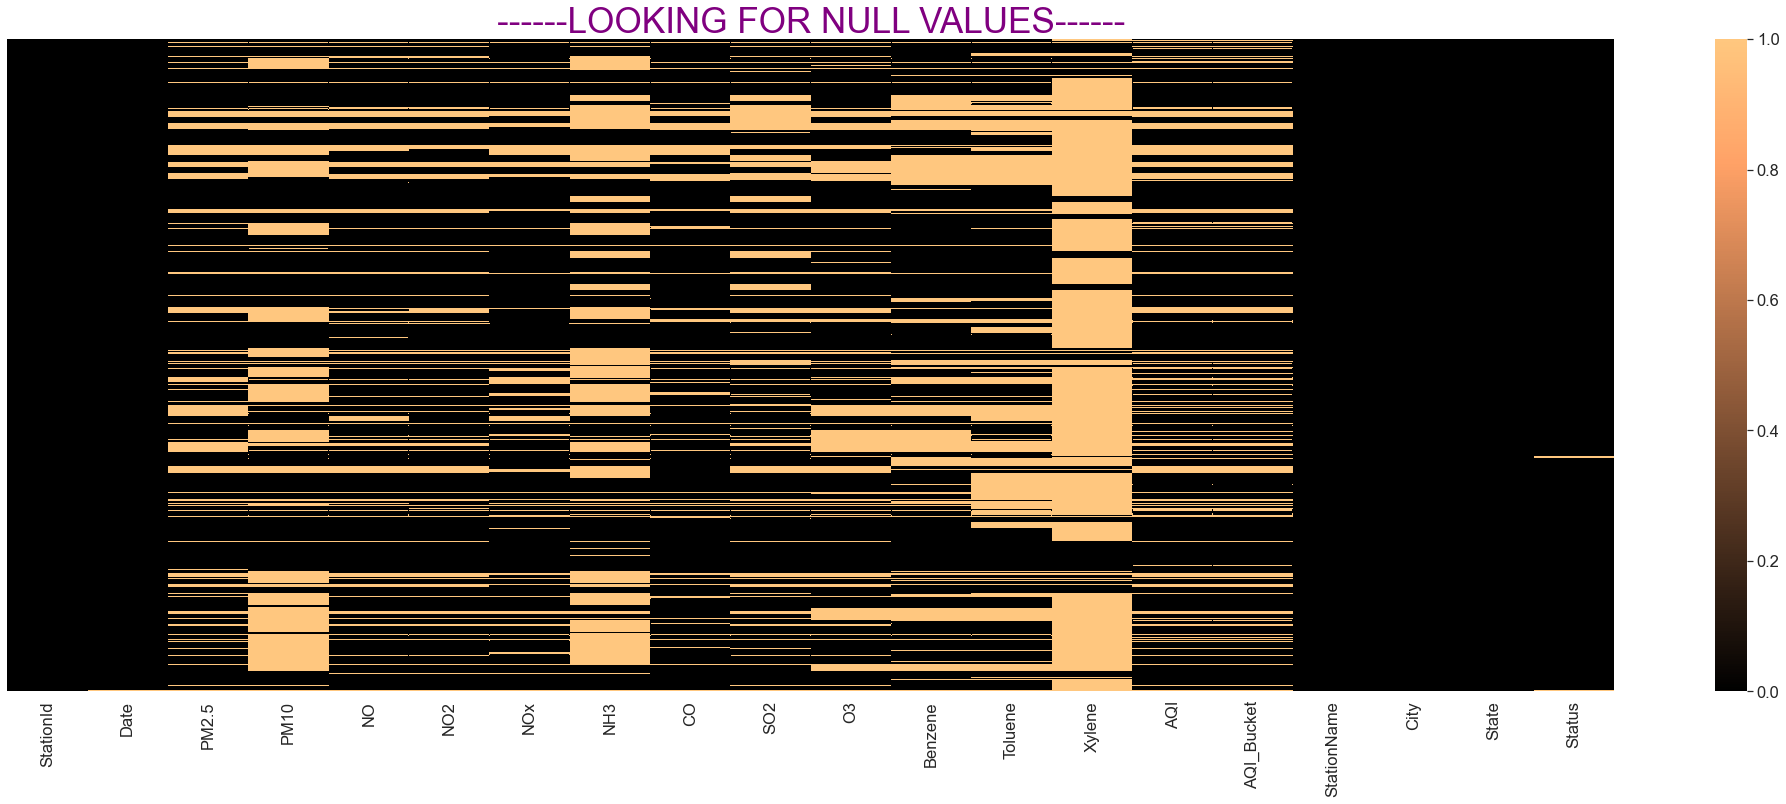

In [10]:
plt.figure(figsize=(36,12))
sns.set(font_scale=1.5)
sns.heatmap(station_day_1.isnull(),cmap = 'copper',yticklabels=False)
plt.title('------LOOKING FOR NULL VALUES------',{'fontsize':35,'color':'purple'})
plt.show()

*PM2.5,	PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene are the pollutants present in the air(pollution).
### White colour in the heatmap represents the null values 
##### Xylene is having 78.91% null values so this column should be dropped off.
##### Remaining null values will be calculated in statistical manner.

In [11]:
(station_day_1.isnull().sum()/len(station_day)*100).sort_values

NumExpr defaulting to 8 threads.


<bound method Series.sort_values of StationId       0.000000
Date            0.111075
PM2.5          20.127736
PM10           39.640857
NO             15.944833
NO2            15.427408
NOx            14.458277
NH3            44.638312
CO             12.142361
SO2            23.440552
O3             23.777480
Benzene        29.226640
Toluene        35.934651
Xylene         78.916092
AQI            19.558476
AQI_Bucket     19.558476
StationName     0.000000
City            0.000000
State           0.000000
Status          0.387837
dtype: float64>

In [12]:
station_day_1['Date'] = station_day_1['Date'].apply(pd.to_datetime)
station_day_1.set_index('Date', inplace = True)

In [13]:
station_day_1.head(2)

StationId  PM2.5    PM10    NO    NO2    NOx    NH3    CO    SO2  \
Date                                                                          
2017-11-24     AP001  71.36  115.75  1.75  20.65  12.40  12.19  0.10  10.76   
2017-11-25     AP001  81.40  124.50  1.44  20.50  12.08  10.72  0.12  15.24   

                O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  \
Date                                                             
2017-11-24  109.26     0.17     5.92    0.10    NaN        NaN   
2017-11-25  127.09     0.20     6.50    0.06  184.0   Moderate   

                               StationName       City           State  Status  
Date                                                                           
2017-11-24  Secretariat, Amaravati - APPCB  Amaravati  Andhra Pradesh  Active  
2017-11-25  Secretariat, Amaravati - APPCB  Amaravati  Andhra Pradesh  Active

In [14]:
station_day_1['StationName'].value_counts()

Manali, Chennai - CPCB                    2009
Alandur Bus Depot, Chennai - CPCB         2009
Lalbagh, Lucknow - CPCB                   2009
CRRI Mathura Road, Delhi - IMD            2009
Velachery Res. Area, Chennai - CPCB       2009
                                          ... 
Belur Math, Howrah - WBPCB                   1
Collector Office, Yadgir - KSPCB             1
Nathu Colony, Ballabgarh - HSPCB             1
Kalyana Nagara, Chikkamagaluru - KSPCB       1
Moti Doongri, Alwar - RSPCB                  1
Name: StationName, Length: 230, dtype: int64

In [15]:
station_day_1['City'].value_counts()

Delhi         45360
Bengaluru     11996
Hyderabad      8752
Chennai        6406
Lucknow        6099
              ...  
Kalaburagi        1
Gobindgarh        1
Rupnagar          1
Bagalkot          1
Jabalpur          1
Name: City, Length: 127, dtype: int64

## **Exploratory data analysis
---------------------------------------------------
### NULL values imputation
Filling remaining null values with mean using lambda function.

In [16]:
station_day_1.iloc[:,1:13] = station_day_1.groupby("StationId").transform(lambda x: x.fillna(x.mean()))

In [17]:
(station_day_1.isnull().sum()/len(station_day_1)*100).sort_values

<bound method Series.sort_values of StationId       0.000000
PM2.5           4.685868
PM10           28.007952
NO              0.793306
NO2             0.110952
NOx             3.310064
NH3            36.728769
CO              1.546854
SO2             8.550691
O3              9.906153
Benzene        17.021867
Toluene        21.864916
Xylene         73.356757
AQI            19.536776
AQI_Bucket     19.536776
StationName     0.000000
City            0.000000
State           0.000000
Status          0.387407
dtype: float64>

#### *Still there are many null values in dataset. So these should be handled manually.
### Again Filling null values with the mean of every single column.

In [18]:
PM25_mean=station_day_1['PM2.5'].mean()
station_day_1['PM2.5'].fillna(value=PM25_mean, inplace=True)

PM10_mean=station_day_1['PM10'].mean()
station_day_1['PM10'].fillna(value=PM10_mean, inplace=True)

NO_mean=station_day_1['NO'].mean()
station_day_1['NO'].fillna(value=NO_mean, inplace=True)

NOx_mean=station_day_1['NOx'].mean()
station_day_1['NOx'].fillna(value=NOx_mean, inplace=True)

NO2_mean=station_day_1['NO2'].mean()
station_day_1['NO2'].fillna(value=NO2_mean, inplace=True)

SO2_mean=station_day_1['SO2'].mean()
station_day_1['SO2'].fillna(value=SO2_mean, inplace=True)

NH3_mean=station_day_1['NH3'].mean()
station_day_1['NH3'].fillna(value=NH3_mean, inplace=True)

O3_mean=station_day_1['O3'].mean()
station_day_1['O3'].fillna(value=O3_mean, inplace=True)

CO_mean=station_day_1['CO'].mean()
station_day_1['CO'].fillna(value=CO_mean, inplace=True)

Benzene_mean=station_day_1['Benzene'].mean()
station_day_1['Benzene'].fillna(value=Benzene_mean, inplace=True)

Toluene_mean=station_day_1['Toluene'].mean()
station_day_1['Toluene'].fillna(value=Toluene_mean, inplace=True)

station_day_1.drop(['Xylene'],axis = 1,inplace = True)


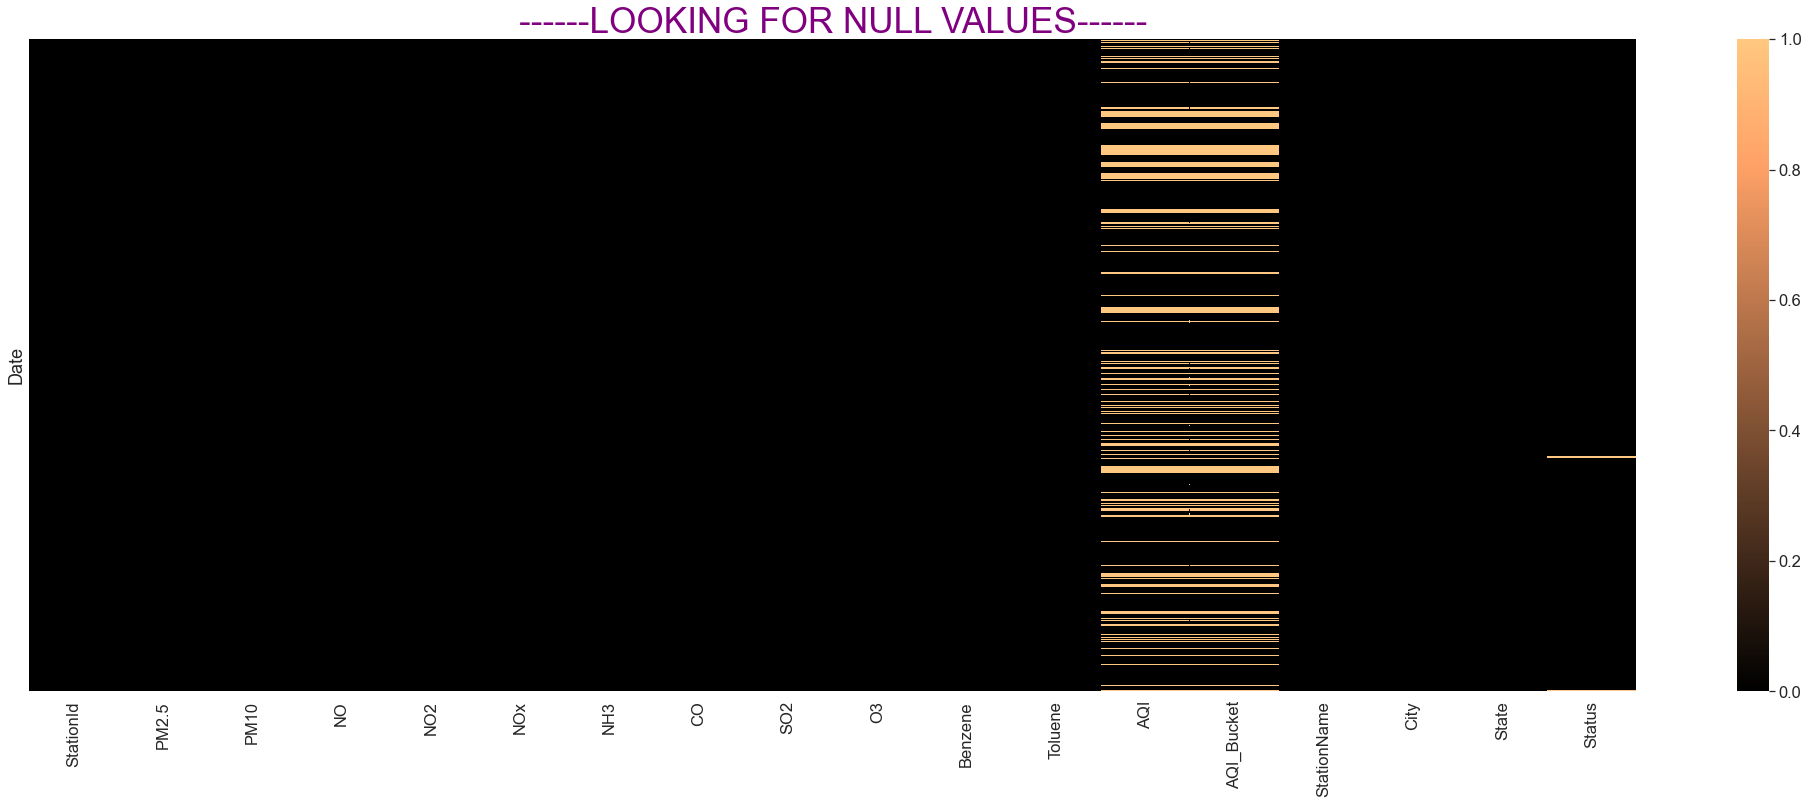

In [19]:
plt.figure(figsize=(36,12))
sns.set(font_scale=1.5)
sns.heatmap(station_day_1.isnull(),cmap = 'copper',yticklabels=False)
plt.title('------LOOKING FOR NULL VALUES------',{'fontsize':35,'color':'purple'})
plt.show()

-------------------------------------------------------
## FEATURE ENGINEERING
--------------------------------------------------------------------------
### *Calculation of Sub-Indexes of seven pollutants
#####  The Sub-indices for individual pollutants at a monitoring location are calculated using its 24-hourly average concentration value (8-hourly in case of CO and O3) and health breakpoint concentration range. The worst sub-index is the AQI for that location. The sub-indices for monitored pollutants are calculated and disseminated, even if data are inadequate for determining AQI. The Individual pollutant-wise sub-index will provide air quality status for that pollutant. 

In [20]:
# PM2.5 Sub-Index calculation

def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x > 30 and x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x > 60 and x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x > 90 and x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x > 120 and x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

station_day_1["PM2.5_SubIndex"] = station_day_1["PM2.5"].astype(int).apply(lambda x: get_PM25_subindex(x))

In [21]:
# PM10 Sub-Index calculation

def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x > 50 and x <= 100:
        return x
    elif x > 100 and x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x > 250 and x <= 350:
        return 200 + (x - 250)
    elif x > 350 and x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

station_day_1["PM10_SubIndex"] = station_day_1["PM10"].astype(int).apply(lambda x: get_PM10_subindex(x))

In [22]:
# SO2 Sub-Index calculation

def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x > 380 and x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x > 800 and x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

station_day_1["SO2_SubIndex"] = station_day_1["SO2"].astype(int).apply(lambda x: get_SO2_subindex(x))

In [23]:
# NOx Sub-Index calculation

def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x > 180 and x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x > 280 and x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

station_day_1["NOx_SubIndex"] = station_day_1["NOx"].astype(int).apply(lambda x: get_NOx_subindex(x))

In [24]:
# NO Sub-Index calculation

def get_NO_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x > 180 and x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x > 280 and x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

station_day_1["NO_SubIndex"] = station_day_1["NO"].astype(int).apply(lambda x: get_NO_subindex(x))

In [25]:
# NO2 Sub-Index calculation

def get_NO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x > 180 and x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x > 280 and x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

station_day_1["NO2_SubIndex"] = station_day_1["NO2"].astype(int).apply(lambda x: get_NO2_subindex(x))

In [26]:
# NH3 Sub-Index calculation

def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x > 200 and x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x > 400 and x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x > 800 and x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x > 1200 and x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

station_day_1["NH3_SubIndex"] = station_day_1["NH3"].astype(int).apply(lambda x: get_NH3_subindex(x))

In [27]:
# CO Sub-Index calculation

def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x > 1 and x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x > 2 and x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x > 10 and x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x > 17 and x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

station_day_1["CO_SubIndex"] = station_day_1["CO"].astype(int).apply(lambda x: get_CO_subindex(x))

In [28]:
# O3 Sub-Index calculation

def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x > 50 and x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x > 100 and x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x > 168 and x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x > 208 and x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

station_day_1["O3_SubIndex"] = station_day_1["O3"].astype(int).apply(lambda x: get_O3_subindex(x))

In [29]:
station_day_1['AQI']

Date
2017-11-24      NaN
2017-11-25    184.0
2017-11-26    197.0
2017-11-27    198.0
2017-11-28    188.0
              ...  
NaT             NaN
NaT             NaN
NaT             NaN
NaT             NaN
NaT             NaN
Name: AQI, Length: 108155, dtype: float64

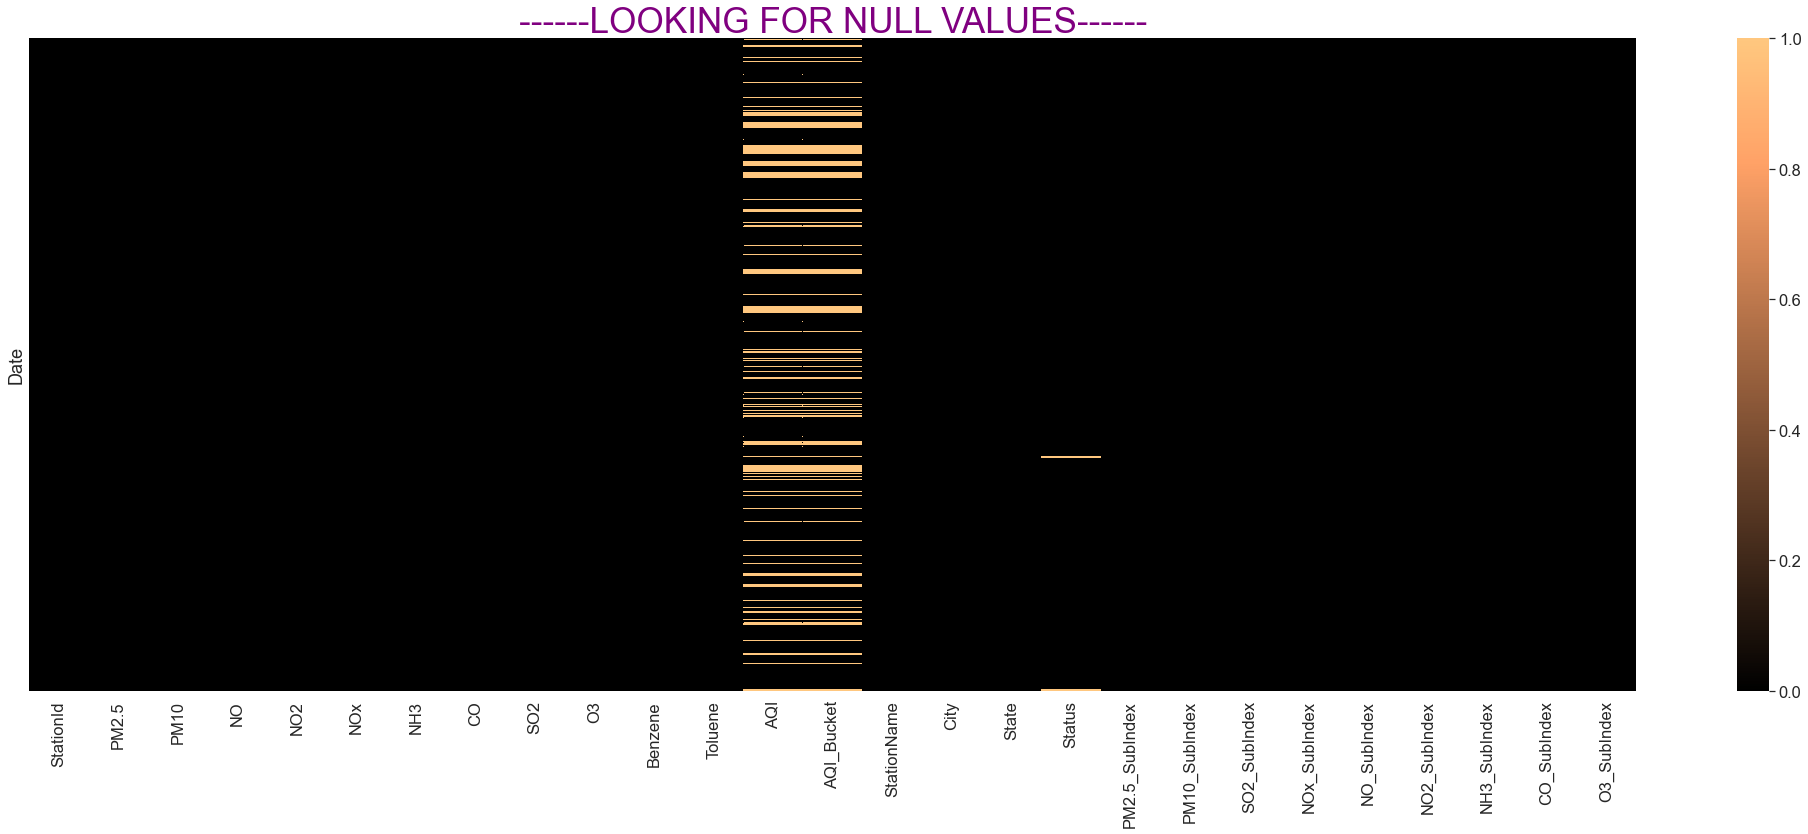

In [30]:
plt.figure(figsize=(36,12))
sns.set(font_scale=1.5)
sns.heatmap(station_day_1.isnull(),cmap = 'copper',yticklabels=False)
plt.title('------LOOKING FOR NULL VALUES------',{'fontsize':35,'color':'purple'})
plt.show()

* Now this data frame is having sub-indexes of 7 major pollutants
______________________________________________________________________________________________________________________________

### Calculating AQI with max of sub-indexes calculated

In [31]:
station_day_1["AQI"] = station_day_1["AQI"].fillna(round(station_day_1[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex","NH3_SubIndex", "CO_SubIndex", "O3_SubIndex","Benzene","Toluene"]].max(axis = 1)))

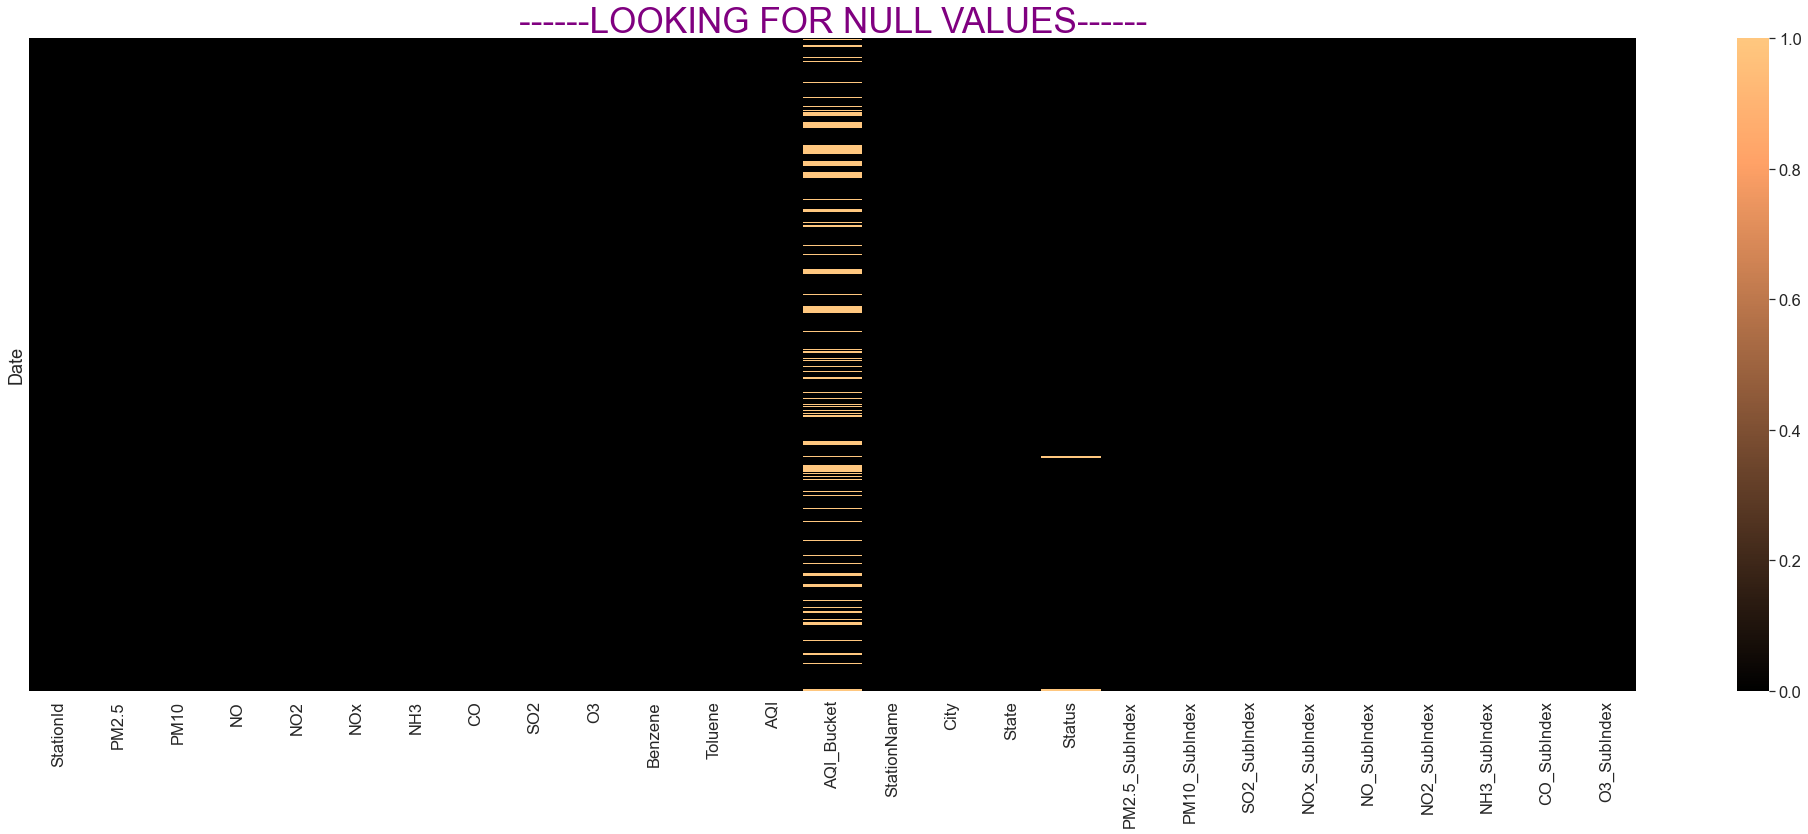

In [32]:
plt.figure(figsize=(36,12))
sns.set(font_scale=1.5)
sns.heatmap(station_day_1.isnull(),cmap = 'copper',yticklabels=False)
plt.title('------LOOKING FOR NULL VALUES------',{'fontsize':35,'color':'purple'})
plt.show()

##### *Here white colour in the heatmap represents the null values in it. This is because the 'AQI_Bucket' will be categorized by the AQI calculated. It will be done by some conditions. According to Central Pollution Control Board every level of the AQI has its own category like if AQI ranges from 0-50 will be considered as "Good", 51-100 will be "Moderate" and so on. Now! we have some missing values in Status that will be filled next.

## AQI table
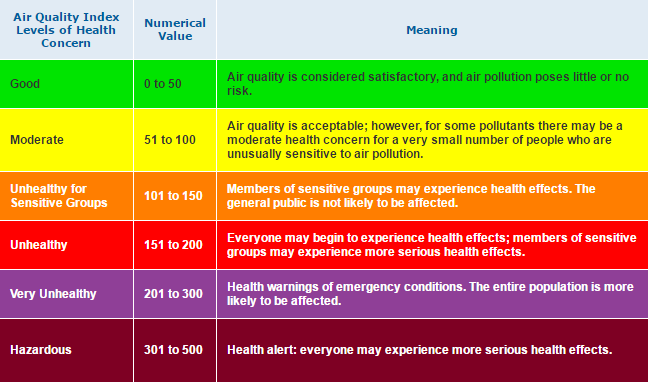

#### ****Above image shows the meaning and quality of air according to the range of AQI.

### AQI bucketing with AQI calculated

In [33]:
station_day_1['AQI']

Date
2017-11-24    137.0
2017-11-25    184.0
2017-11-26    197.0
2017-11-27    198.0
2017-11-28    188.0
              ...  
NaT           167.0
NaT           167.0
NaT           167.0
NaT           167.0
NaT           167.0
Name: AQI, Length: 108155, dtype: float64

In [34]:
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x > 50 and x <= 100:
        return "Satisfactory"
    elif x > 100 and x <= 200:
        return "Moderate"
    elif x > 200 and x <= 300:
        return "Poor"
    elif x > 300 and x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return '0'
    
station_day_1["AQI_Bucket"] = station_day_1["AQI_Bucket"].fillna(station_day_1["AQI"].apply(lambda x: get_AQI_bucket(x)))

### *Cleaned data after analysis

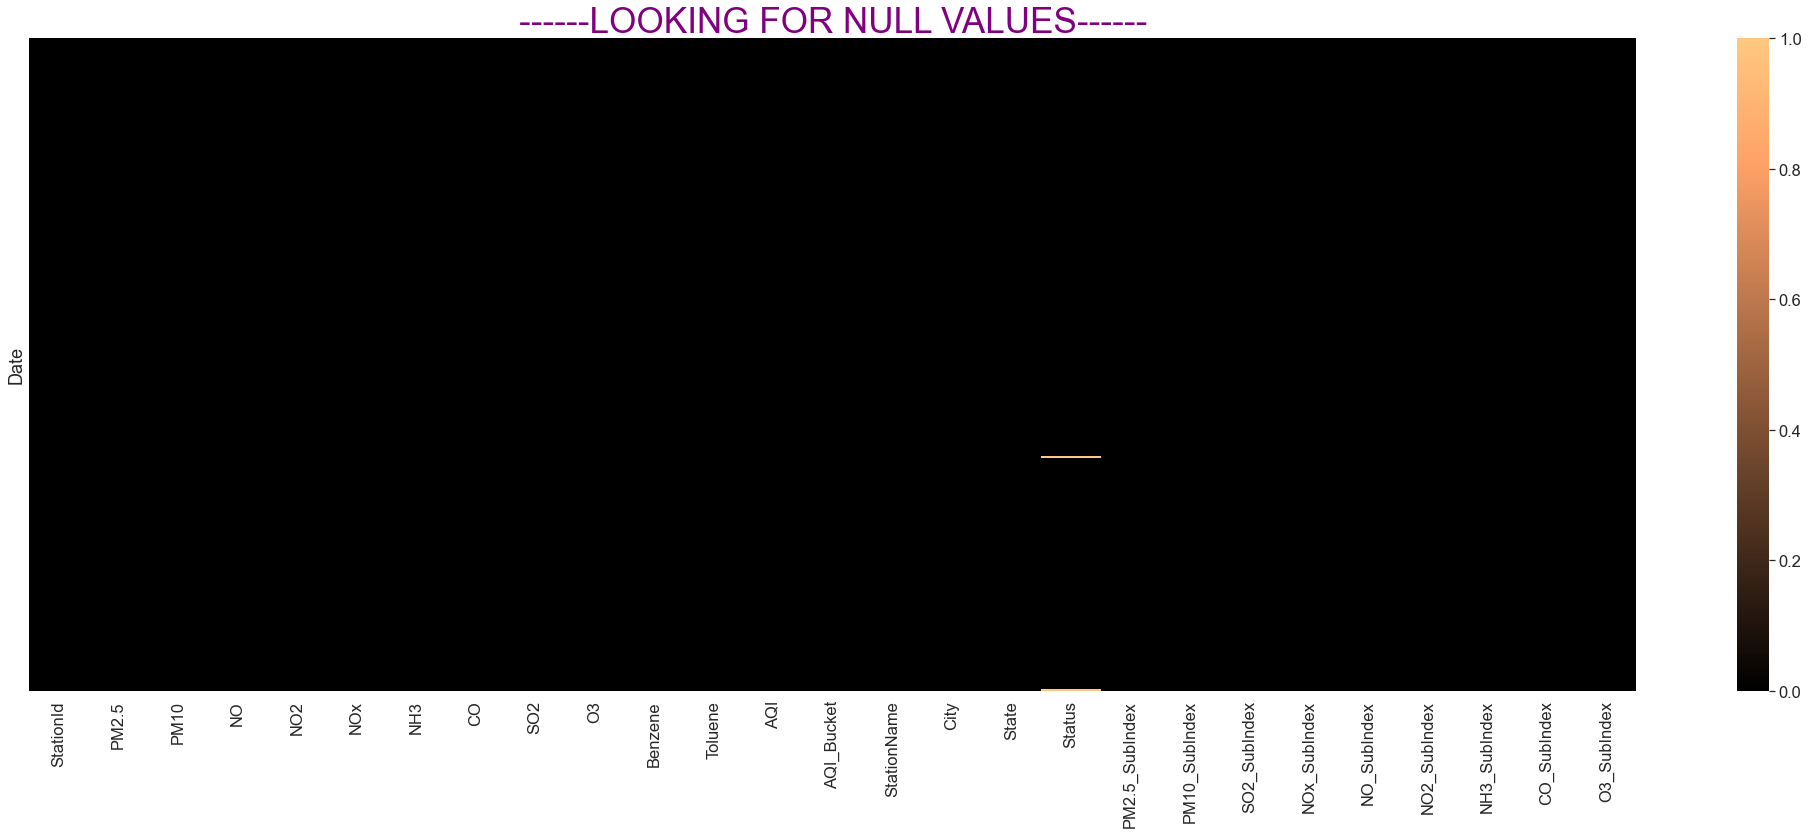

In [35]:
plt.figure(figsize=(36,12))
sns.set(font_scale=1.5)
sns.heatmap(station_day_1.isnull(),cmap = 'copper',yticklabels=False)
plt.title('------LOOKING FOR NULL VALUES------',{'fontsize':35,'color':'purple'})
plt.show()

##### *Status is missing some values so those would be dropped row wise as same can not be calculated with any method.

In [36]:
station_day_1.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

### * Cleaned data after analysis

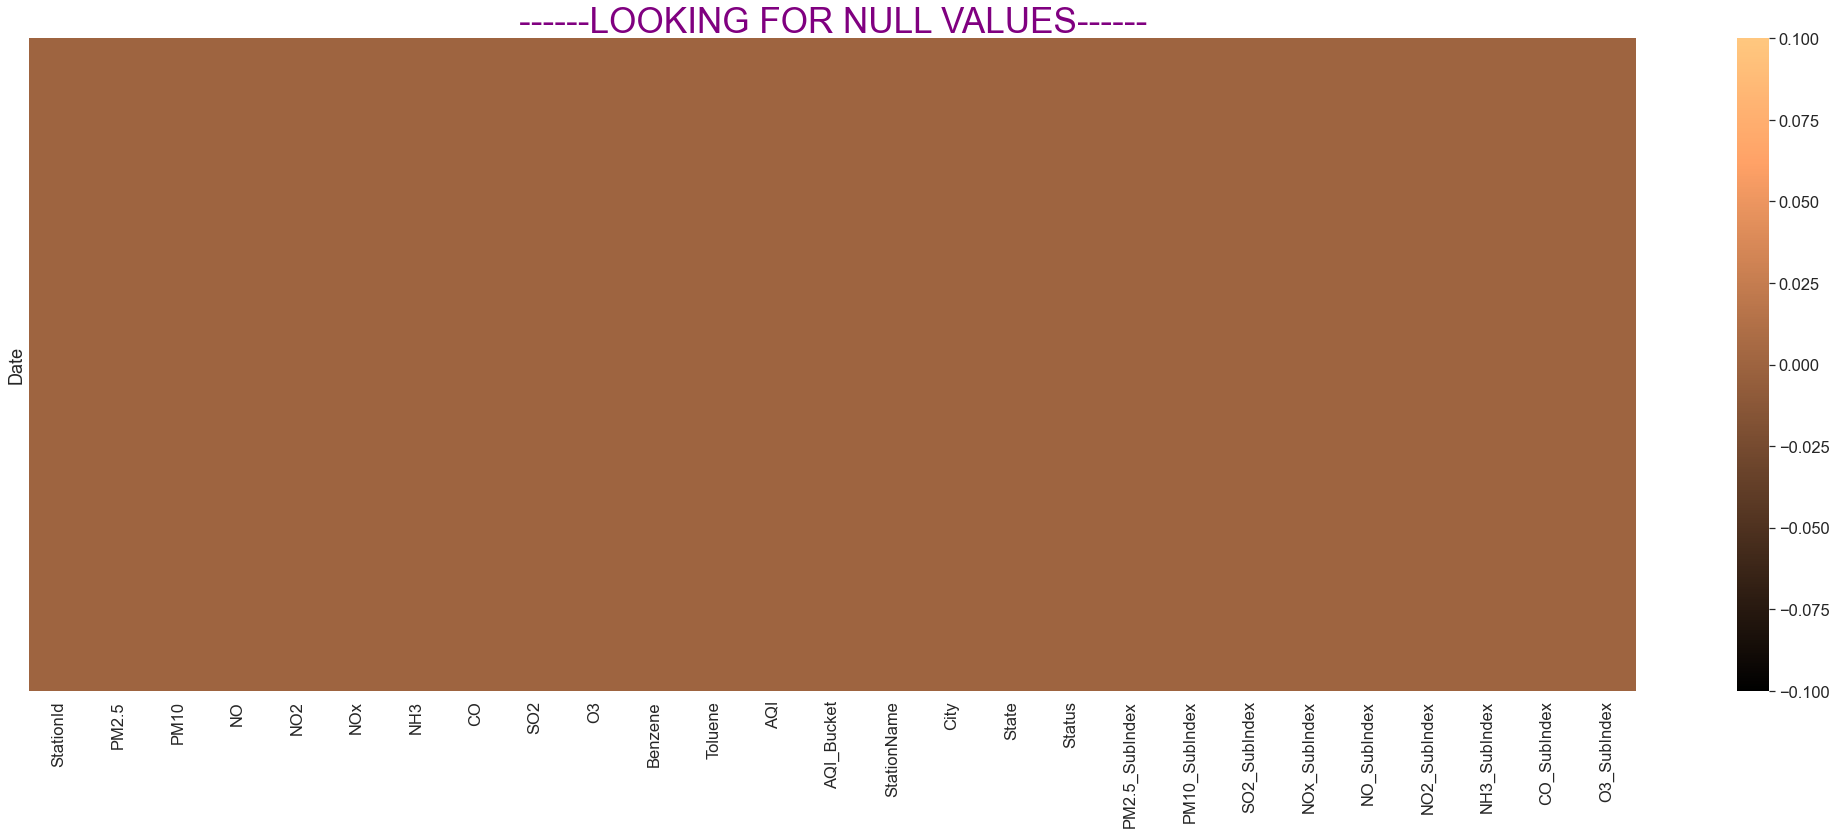

In [37]:
plt.figure(figsize=(36,12))
sns.set(font_scale=1.5)
sns.heatmap(station_day_1.isnull(),cmap = 'copper',yticklabels=False)
plt.title('------LOOKING FOR NULL VALUES------',{'fontsize':35,'color':'purple'})
plt.show()

*Black colour represents there is no null value in dataset.

In [38]:
station_day_1

StationId      PM2.5        PM10         NO        NO2        NOx  \
Date                                                                           
2017-11-24     AP001  71.360000  115.750000   1.750000  20.650000  12.400000   
2017-11-25     AP001  81.400000  124.500000   1.440000  20.500000  12.080000   
2017-11-26     AP001  78.320000  129.060000   1.260000  26.000000  14.850000   
2017-11-27     AP001  88.760000  135.320000   6.600000  30.850000  21.770000   
2017-11-28     AP001  64.180000  104.090000   2.560000  28.070000  17.010000   
...              ...        ...         ...        ...        ...        ...   
NaT            HR025  80.751455  157.482685  23.316058  35.573628  41.130477   
NaT            HR026  80.751455  157.482685  23.316058  35.573628  41.130477   
NaT            HR027  80.751455  157.482685  23.316058  35.573628  41.130477   
NaT            HR028  80.751455  157.482685  23.316058  35.573628  41.130477   
NaT            HR029  80.751455  157.482685  23.316058  35.573628  41.130477   

                  NH3        CO        SO2          O3  ...  Status  \
Date                                                    ...           
2017-11-24  12.190000  0.100000  10.760000  109.260000  ...  Active   
2017-11-25  10.720000  0.120000  15.240000  127.090000  ...  Active   
2017-11-26  10.280000  0.140000  26.960000  117.440000  ...  Active   
2017-11-27  12.910000  0.110000  33.590000  111.810000  ...  Active   
2017-11-28  11.420000  0.090000  19.000000  138.180000  ...  Active   
...               ...       ...        ...         ...  ...     ...   
NaT         28.959737  1.724534  12.465926   38.272819  ...  Active   
NaT         28.959737  1.724534  12.465926   38.272819  ...  Active   
NaT         28.959737  1.724534  12.465926   38.272819  ...  Active   
NaT         28.959737  1.724534  12.465926   38.272819  ...  Active   
NaT         28.959737  1.724534  12.465926   38.272819  ...  Active   

            PM2.5_SubIndex  PM10_SubIndex SO2_SubIndex NOx_SubIndex  \
Date                                                                  
2017-11-24      136.666667     110.000000        12.50        15.00   
2017-11-25      170.000000     116.000000        18.75        15.00   
2017-11-26      160.000000     119.333333        32.50        17.50   
2017-11-27      193.333333     123.333333        41.25        26.25   
2017-11-28      113.333333     102.666667        23.75        21.25   
...                    ...            ...          ...          ...   
NaT             166.666667     138.000000        15.00        51.25   
NaT             166.666667     138.000000        15.00        51.25   
NaT             166.666667     138.000000        15.00        51.25   
NaT             166.666667     138.000000        15.00        51.25   
NaT             166.666667     138.000000        15.00        51.25   

           NO_SubIndex NO2_SubIndex NH3_SubIndex  CO_SubIndex  O3_SubIndex  
Date                                                                        
2017-11-24        1.25        25.00         3.00          0.0   113.235294  
2017-11-25        1.25        25.00         2.50          0.0   139.705882  
2017-11-26        1.25        32.50         2.50          0.0   125.000000  
2017-11-27        7.50        37.50         3.00          0.0   116.176471  
2017-11-28        2.50        35.00         2.75          0.0   155.882353  
...                ...          ...          ...          ...          ...  
NaT              28.75        43.75         7.00         50.0    38.000000  
NaT              28.75        43.75         7.00         50.0    38.000000  
NaT              28.75        43.75         7.00         50.0    38.000000  
NaT              28.75        43.75         7.00         50.0    38.000000  
NaT              28.75        43.75         7.00         50.0    38.000000  

[107736 rows x 27 columns]

In [39]:
df_station_day = station_day_1.copy()
df_station_day.columns

Index(['StationId', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket', 'StationName', 'City',
       'State', 'Status', 'PM2.5_SubIndex', 'PM10_SubIndex', 'SO2_SubIndex',
       'NOx_SubIndex', 'NO_SubIndex', 'NO2_SubIndex', 'NH3_SubIndex',
       'CO_SubIndex', 'O3_SubIndex'],
      dtype='object')

# **VISUALIZING DATA

#### *1. Correlation heatmap with annotaion 

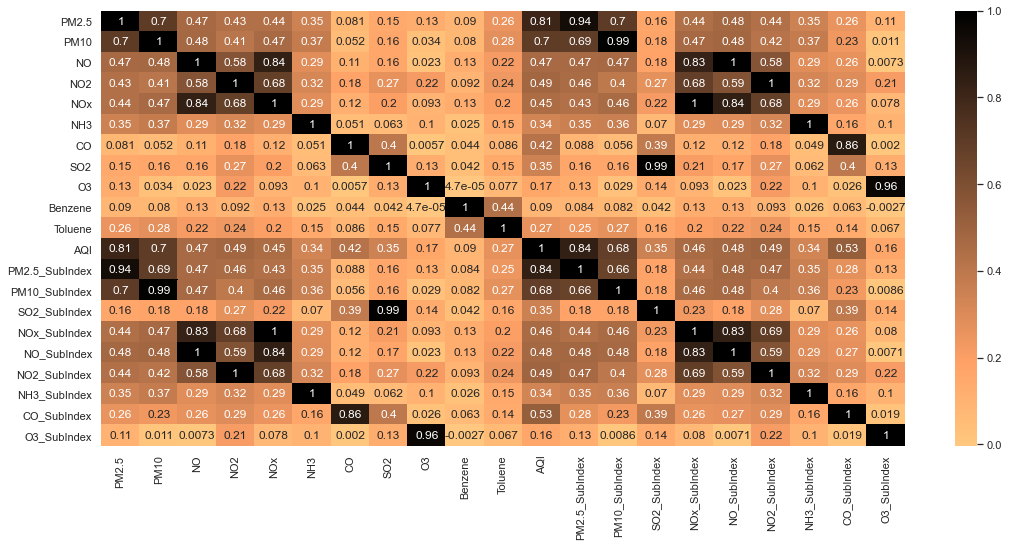

In [40]:
sns.set(font_scale=1)
plt.figure(figsize=(18,8))
sns.heatmap(station_day_1.corr(),cmap='copper_r',annot=True);

##### *This heatmap is having all the polllutants and their sub-indexe. The darker the intersection is the positive the correlation is and vice-versa. (1 represents positively correlated and 0 is negatively corerlated).

#### *2.Pollutants frequency line graph

                                Distribution of different pollutants in last 5 years


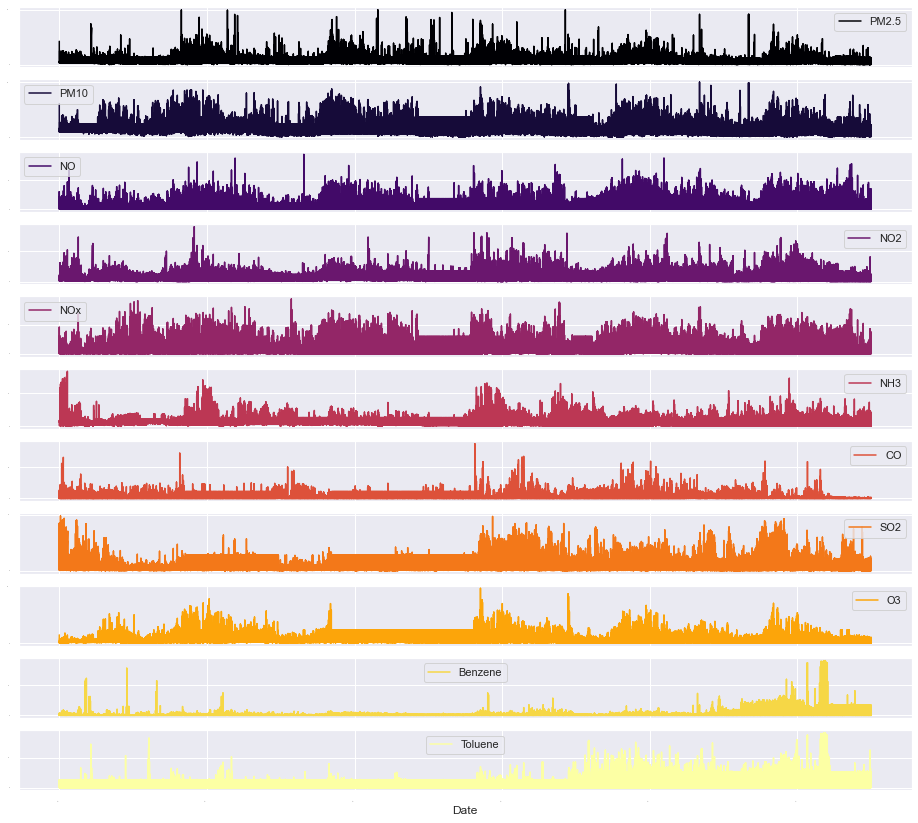

In [41]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene']
df_station_day = df_station_day[pollutants]

print('                                Distribution of different pollutants in last 5 years')
df_station_day.plot(kind='line',figsize=(16,16),cmap='inferno',subplots=True,fontsize=1);

#### *3. Average AQI of states in last 5 years

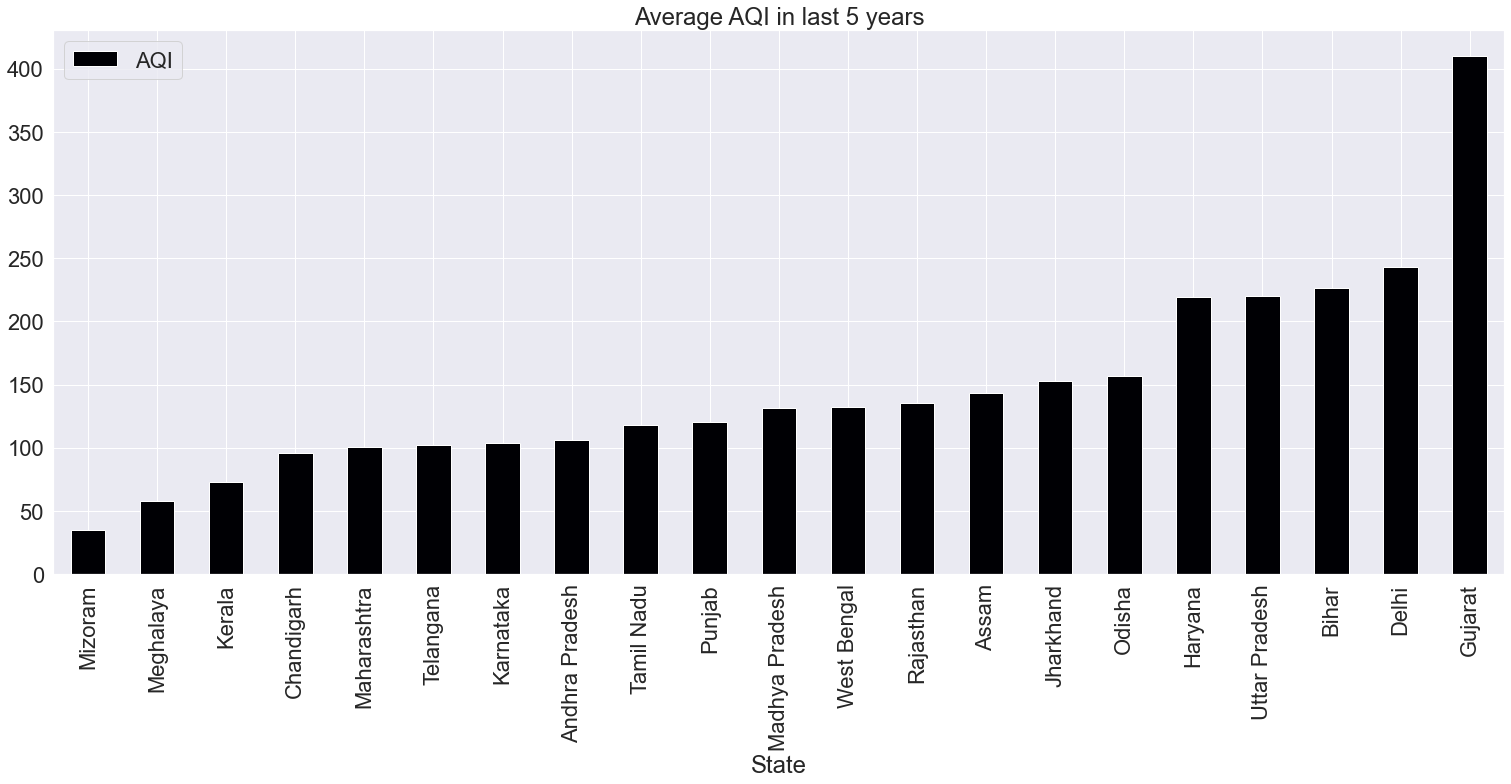

In [42]:
sns.set(font_scale=2)
station_day_1[['State','AQI',]].groupby('State').mean().sort_values('AQI').plot(kind='bar',cmap='inferno',figsize=(26,10))
plt.title('Average AQI in last 5 years');

#### *4. Active and non-active stations in states

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Andhra Pradesh'),
  Text(1, 0, 'Assam'),
  Text(2, 0, 'Bihar'),
  Text(3, 0, 'Chandigarh'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Gujarat'),
  Text(6, 0, 'Haryana'),
  Text(7, 0, 'Jharkhand'),
  Text(8, 0, 'Karnataka'),
  Text(9, 0, 'Kerala'),
  Text(10, 0, 'Maharashtra'),
  Text(11, 0, 'Meghalaya'),
  Text(12, 0, 'Madhya Pradesh'),
  Text(13, 0, 'Mizoram'),
  Text(14, 0, 'Odisha'),
  Text(15, 0, 'Punjab'),
  Text(16, 0, 'Rajasthan'),
  Text(17, 0, 'Telangana'),
  Text(18, 0, 'Tamil Nadu'),
  Text(19, 0, 'Uttar Pradesh'),
  Text(20, 0, 'West Bengal')])

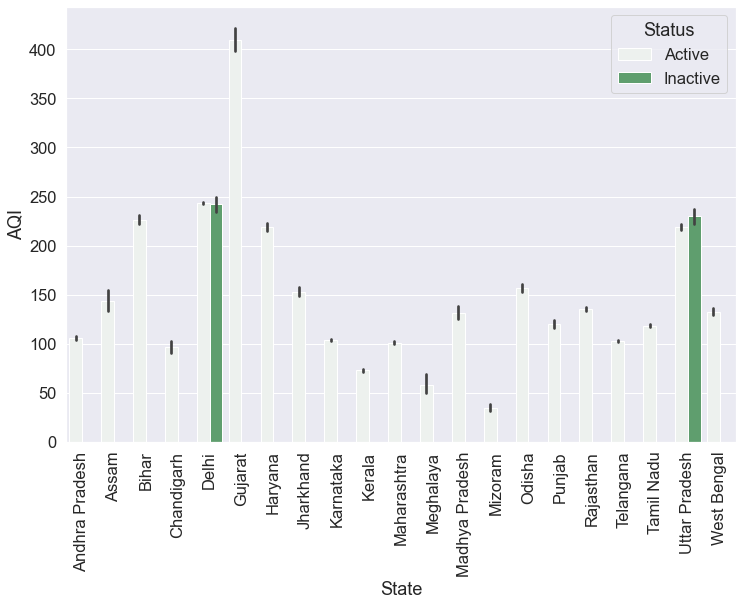

In [43]:
sns.set(font_scale=1.5)
plt.figure(figsize=(12,8))
sns.barplot(station_day_1['State'],station_day_1['AQI'],station_day_1['Status'],color = 'g')
plt.matplotlib.pyplot.xticks(rotation=90)

#### *5. Standards of air quality in diffrent states

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

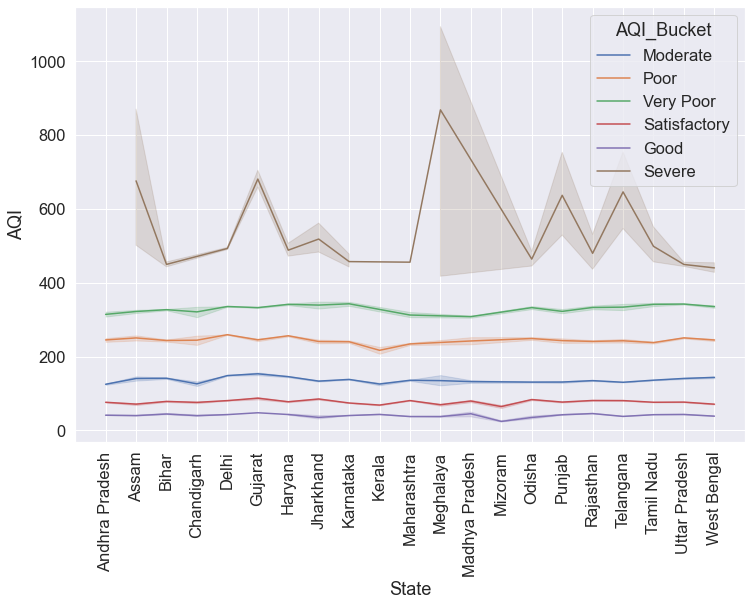

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)
plt.figure(figsize=(12,8))
sns.lineplot(station_day_1["State"],station_day_1["AQI"],station_day_1["AQI_Bucket"])
plt.matplotlib.pyplot.xticks(rotation=90)

#### *6. Level of pollutants by year 

<AxesSubplot:xlabel='Date'>

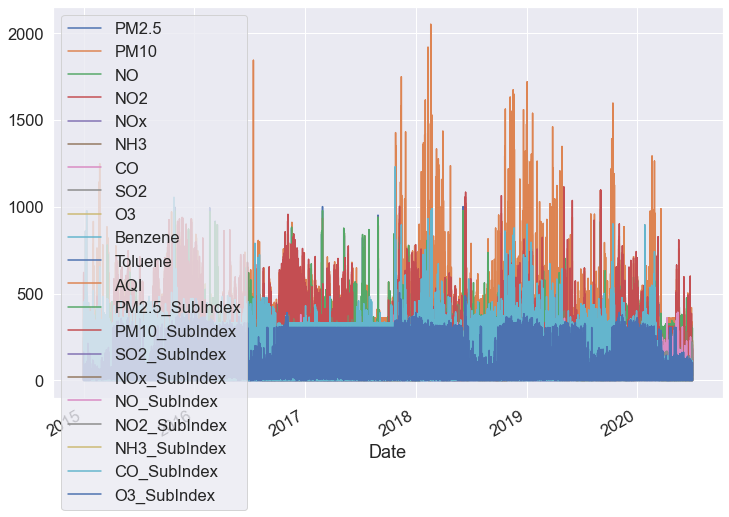

In [45]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8
station_day_1.plot()

##### 7. Box plotting of every pollutant with level of AQI's category.

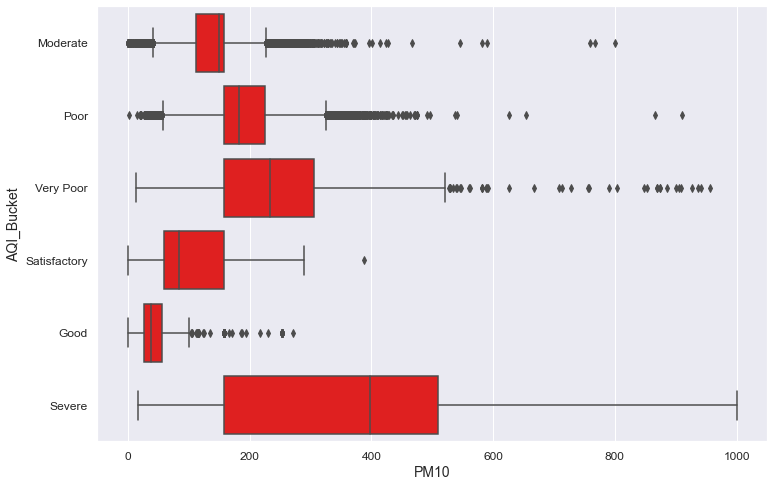

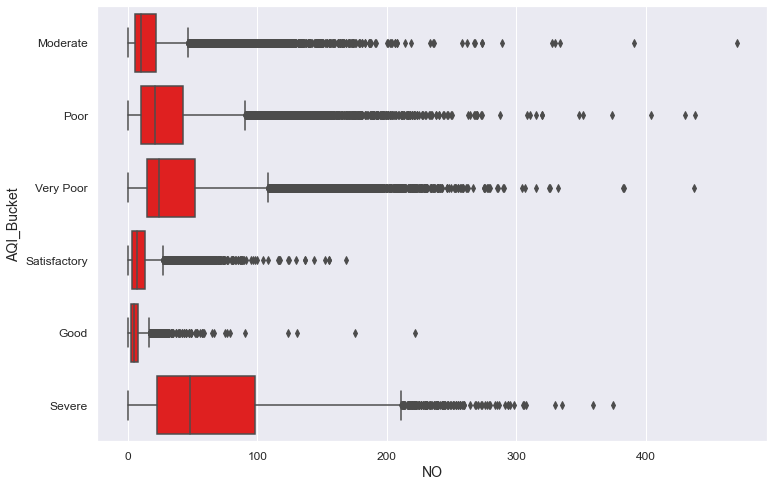

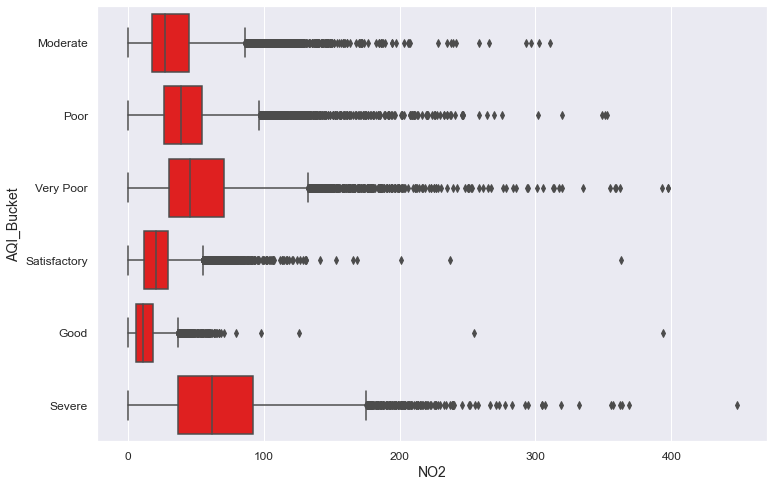

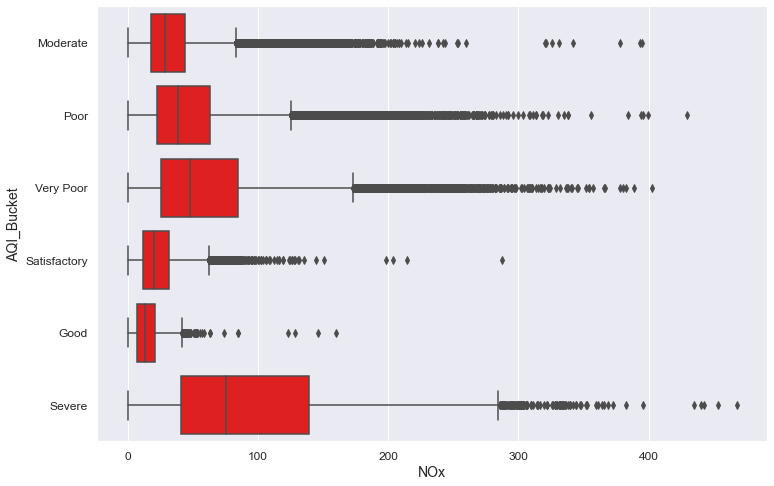

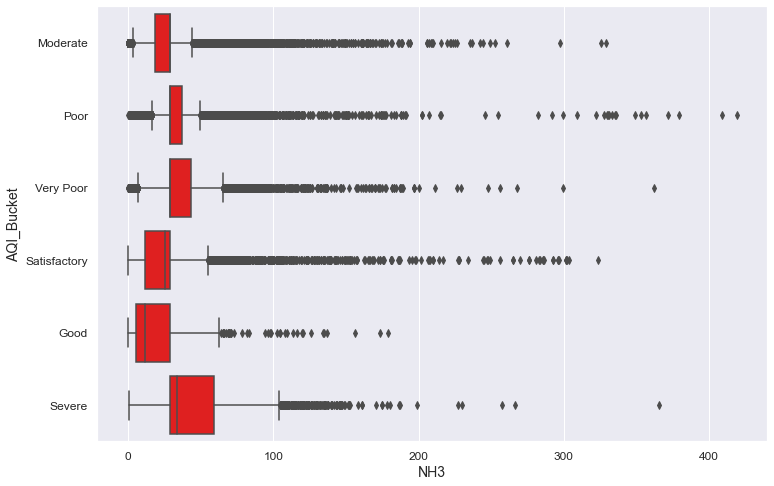

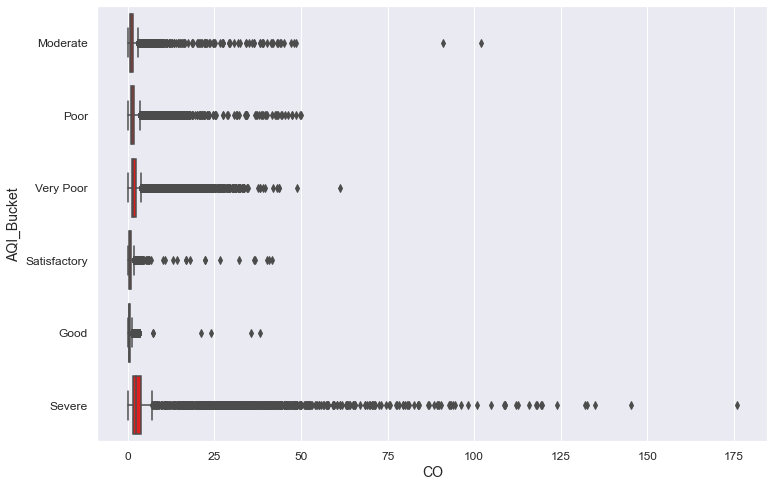

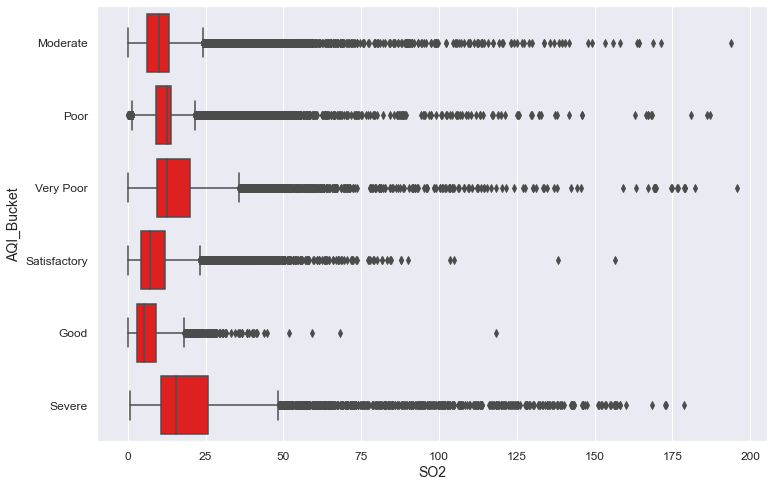

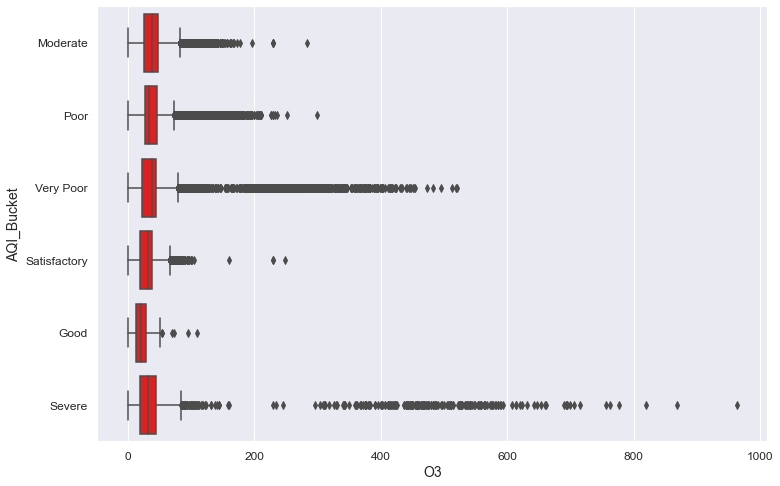

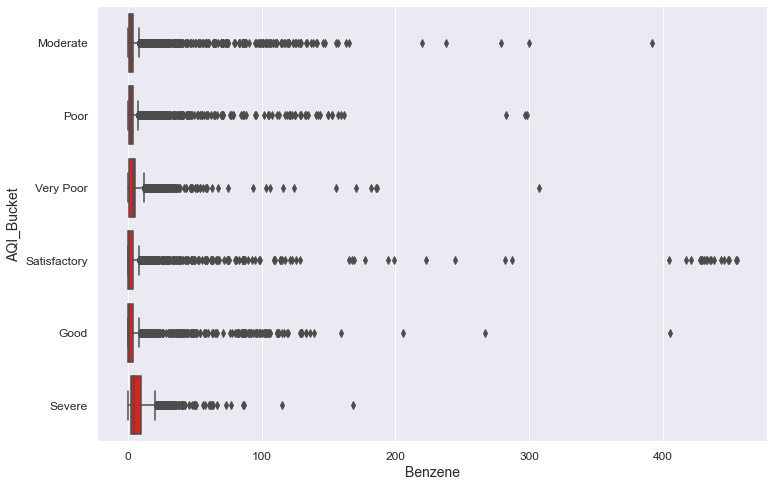

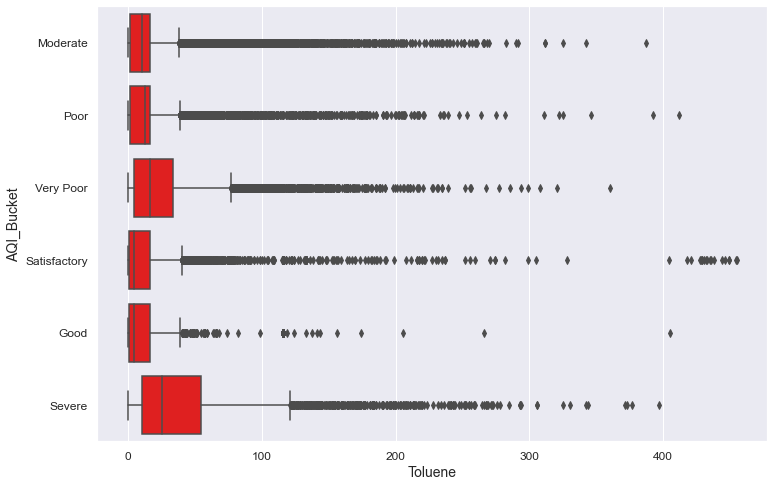

In [46]:
def boxplot_station_day_1(y_var):
    boxplot_station_day_1 = station_day_1.drop(y_var, axis = 1)
    i = boxplot_station_day_1.columns
    
    
    plot = sns.boxplot(i[2], y_var, data = station_day_1, color = 'red')#, edgecolor = 'b
    plt.xlabel('{}'.format(i[2]), fontsize = 14)
    plt.ylabel('AQI_Bucket', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    
    plot = sns.boxplot(i[3], y_var, data = station_day_1, color = 'red')
    plt.xlabel('{}'.format(i[3]), fontsize = 14)
    plt.ylabel('AQI_Bucket', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    
    plot = sns.boxplot(i[4], y_var, data = station_day_1, color = 'red')
    plt.xlabel('{}'.format(i[4]), fontsize = 14)
    plt.ylabel('AQI_Bucket', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    
    plot = sns.boxplot(i[5], y_var, data = station_day_1, color = 'red')
    plt.xlabel('{}'.format(i[5]), fontsize = 14)
    plt.ylabel('AQI_Bucket', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    
    plot = sns.boxplot(i[6], y_var, data = station_day_1, color = 'red')
    plt.xlabel('{}'.format(i[6]), fontsize = 14)
    plt.ylabel('AQI_Bucket', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    
    plot = sns.boxplot(i[7], y_var, data = station_day_1, color = 'red')
    plt.xlabel('{}'.format(i[7]), fontsize = 14)
    plt.ylabel('AQI_Bucket', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    
    plot = sns.boxplot(i[8], y_var, data = station_day_1, color = 'red')
    plt.xlabel('{}'.format(i[8]), fontsize = 14)
    plt.ylabel('AQI_Bucket', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    
    plot = sns.boxplot(i[9], y_var, data = station_day_1, color = 'red')
    plt.xlabel('{}'.format(i[9]), fontsize = 14)
    plt.ylabel('AQI_Bucket', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    
    plot = sns.boxplot(i[10], y_var, data = station_day_1, color = 'red')
    plt.xlabel('{}'.format(i[10]), fontsize = 14)
    plt.ylabel('AQI_Bucket', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    
    plot = sns.boxplot(i[11], y_var, data = station_day_1, color = 'red')
    plt.xlabel('{}'.format(i[11]), fontsize = 14)
    plt.ylabel('AQI_Bucket', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    

boxplot_station_day_1('AQI_Bucket')

In [47]:
# sns.set(font_scale=2)
# station_day_1[['City','AQI']].groupby('City').mean().sort_values('AQI').plot(kind='bar',cmap='copper_r',figsize=(26,10),color = 'Brown')
# plt.title('Average AQI in last 5 years');

In [48]:
station_day_1['AQI_Bucket'].value_counts()

Moderate        37288
Satisfactory    26461
Poor            17695
Very Poor       15021
Good             5832
Severe           5439
Name: AQI_Bucket, dtype: int64

In [49]:
station_day_1.columns

Index(['StationId', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket', 'StationName', 'City',
       'State', 'Status', 'PM2.5_SubIndex', 'PM10_SubIndex', 'SO2_SubIndex',
       'NOx_SubIndex', 'NO_SubIndex', 'NO2_SubIndex', 'NH3_SubIndex',
       'CO_SubIndex', 'O3_SubIndex'],
      dtype='object')

## **STORING TARGET VALUES FOR INDEPENDENT AND DEPENDENT VARIABLES.

In [50]:
final_df= station_day_1[['AQI', 'AQI_Bucket']].copy()
final_df

AQI AQI_Bucket
Date                        
2017-11-24  137.0   Moderate
2017-11-25  184.0   Moderate
2017-11-26  197.0   Moderate
2017-11-27  198.0   Moderate
2017-11-28  188.0   Moderate
...           ...        ...
NaT         167.0   Moderate
NaT         167.0   Moderate
NaT         167.0   Moderate
NaT         167.0   Moderate
NaT         167.0   Moderate

[107736 rows x 2 columns]

In [51]:
final_df['AQI_Bucket'] = final_df['AQI_Bucket'].map({'Good' :1, 'Satisfactory' :2, 'Moderate' :3, 'Poor' :4, 'Very Poor' :5, 'Severe' :6}).astype(int) #mapping numbers
final_df.head()

AQI  AQI_Bucket
Date                         
2017-11-24  137.0           3
2017-11-25  184.0           3
2017-11-26  197.0           3
2017-11-27  198.0           3
2017-11-28  188.0           3

In [52]:
X = final_df[['AQI']]
y = final_df[['AQI_Bucket']]

In [53]:
df=X.resample(rule='MS').sum()

In [54]:
df.shape

(67, 1)

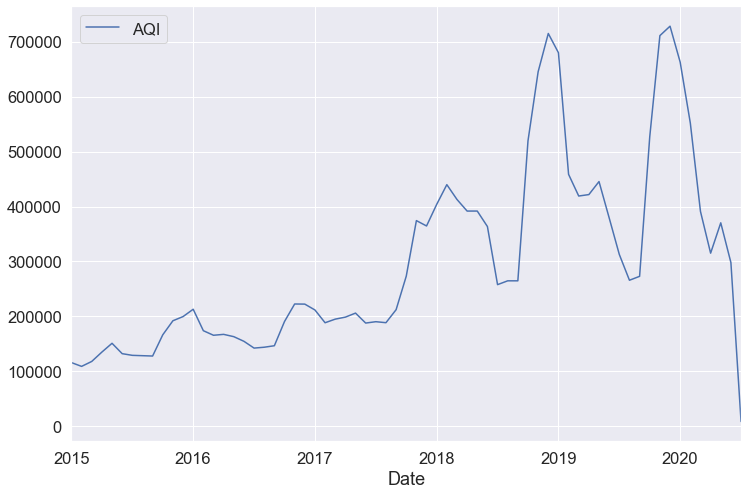

In [55]:
df.plot()
rcParams['figure.figsize'] = 14,6

# Seasonal decomposing.

In [56]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

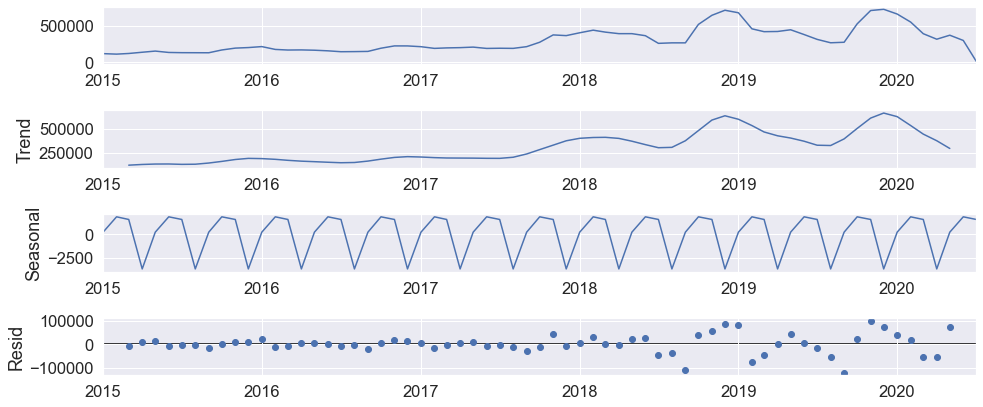

In [57]:
seasonal_decompose(df,model='additive',freq=4).plot();
rcParams['figure.figsize'] = 12,8

In [58]:
train=df[:50] #till feb2020
test=df[50:] # from feb2020

In [59]:
test

AQI
Date                
2019-03-01  419077.0
2019-04-01  421702.0
2019-05-01  445394.0
2019-06-01  379364.0
2019-07-01  312751.0
2019-08-01  265803.0
2019-09-01  272907.0
2019-10-01  526813.0
2019-11-01  710997.0
2019-12-01  728191.0
2020-01-01  662713.0
2020-02-01  551837.0
2020-03-01  391059.0
2020-04-01  315087.0
2020-05-01  370318.0
2020-06-01  297950.0
2020-07-01    8643.0

# ARIMA MODEL
-------------------------------

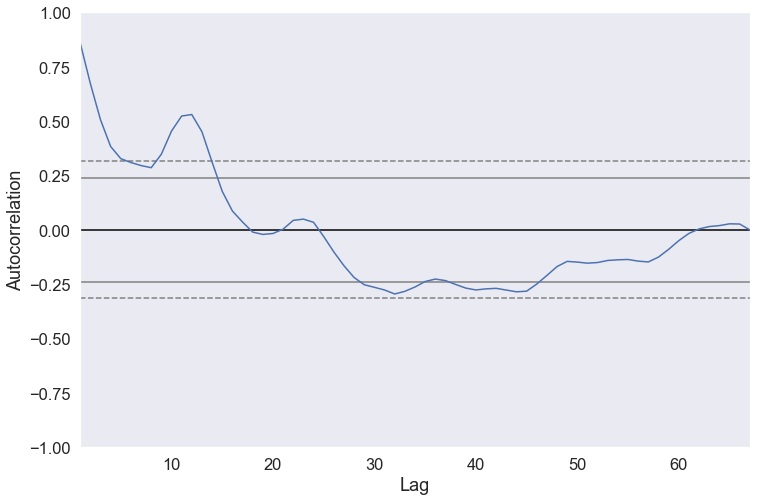

In [60]:
import pandas
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['AQI'])
plt.show()

In [61]:
model=ARIMA(df['AQI'],order=(2,2,3))
model_fit=model.fit()
import warnings
warnings.filterwarnings("ignore")

C:\Users\asus\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\asus\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\asus\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [62]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    AQI   No. Observations:                   67
Model:                 ARIMA(2, 2, 3)   Log Likelihood                -814.915
Date:                Tue, 04 Jan 2022   AIC                           1641.829
Time:                        00:39:12   BIC                           1654.875
Sample:                    01-01-2015   HQIC                          1646.977
                         - 07-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9551      0.134      7.150      0.000       0.693       1.217
ar.L2         -0.9068      0.094     -9.683      0.000      -1.090      -0.723
ma.L1         -1.4665      0.218     -6.715      0.000      -1.895      -1.038
ma.L2          1.3308      0.242      5.490      0.000       0.856       1.806
ma.L3         -0.7098      0.185     -3.835      0.000      -1.072      -0.347
sigma2      5.964e+09   3.12e-11   1.91e+20      0.000    5.96e+09    5.96e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.79   Jarque-Bera (JB):                38.10
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):              23.20   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.97e+37. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='Date'>

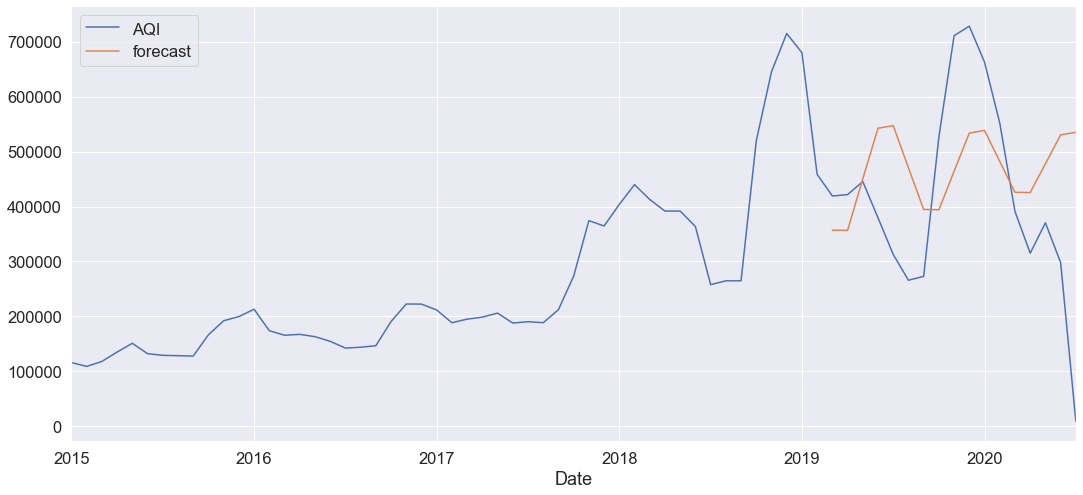

In [63]:
df['forecast']=model_fit.predict(start=50,end=90,dynamic=True)
df[['AQI','forecast']].plot(figsize=(18,8))

##### ***As  the data is seasonal then ARIMA model seems very less applicable to this data.

# SARIMAX MODEL
-----------------------------------

In [64]:
import statsmodels.api as sm

In [65]:
model=sm.tsa.statespace.SARIMAX(df['AQI'],order=(2, 2, 2),seasonal_order=(1,2,2,12))
results = model.fit()

<AxesSubplot:xlabel='Date'>

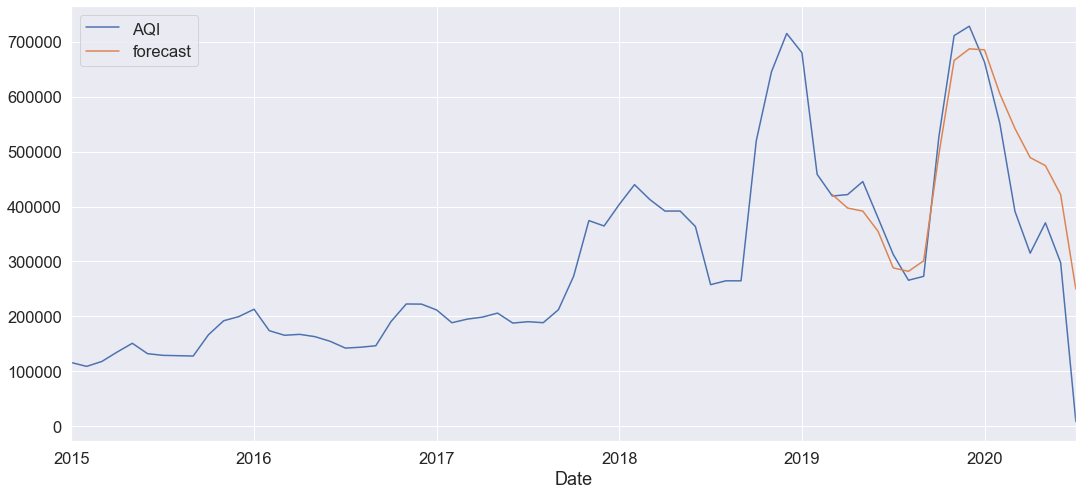

In [66]:
df['forecast']=results.predict(start=50,end=90,dynamic=True)
df[['AQI','forecast']].plot(figsize=(18,8))

##### ***As the data is seasonal. so the SARIMAX modelling will be perfect for this time series analysis and forecasting.

## DATEOFFSET
-------------------------------
##### *Dateoffsets are a standard kind of date increment used for a date range in Pandas. It works exactly like relativedelta in terms of the keyword args we pass in. DateOffsets can be created to move dates forward a given number of valid dates. For example, Bday(2) can be added to a date to move it two business days forward. If the date does not start on a valid date, first it is moved to a valid date and then offset is created but Here! we are going to increment many months in this dataset.

In [67]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,22)]

In [68]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [69]:
future_datest_df

AQI forecast
2020-08-01  NaN      NaN
2020-09-01  NaN      NaN
2020-10-01  NaN      NaN
2020-11-01  NaN      NaN
2020-12-01  NaN      NaN
2021-01-01  NaN      NaN
2021-02-01  NaN      NaN
2021-03-01  NaN      NaN
2021-04-01  NaN      NaN
2021-05-01  NaN      NaN
2021-06-01  NaN      NaN
2021-07-01  NaN      NaN
2021-08-01  NaN      NaN
2021-09-01  NaN      NaN
2021-10-01  NaN      NaN
2021-11-01  NaN      NaN
2021-12-01  NaN      NaN
2022-01-01  NaN      NaN
2022-02-01  NaN      NaN
2022-03-01  NaN      NaN
2022-04-01  NaN      NaN

In [70]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

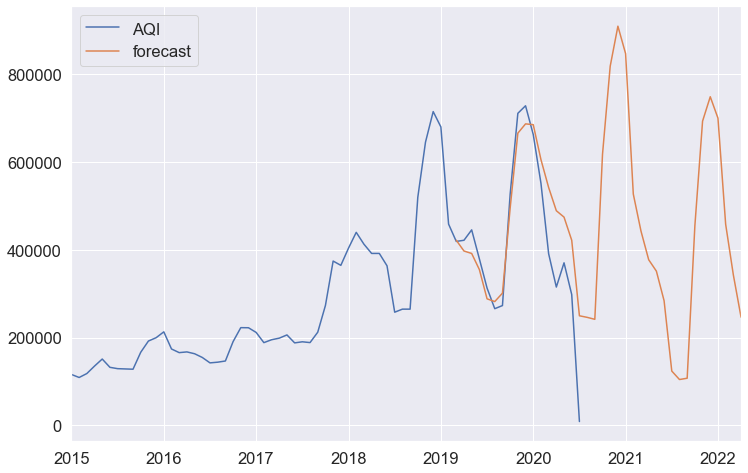

In [71]:
future_df['forecast'] = results.predict(start = 50, end = 90, dynamic= True)  
future_df[['AQI', 'forecast']].plot(figsize=(12, 8)) 

In [72]:
future_df

AQI       forecast
2015-01-01  115909.0            NaN
2015-02-01  109016.0            NaN
2015-03-01  118015.0            NaN
2015-04-01  135066.0            NaN
2015-05-01  151048.0            NaN
...              ...            ...
2021-12-01       NaN  748779.427021
2022-01-01       NaN  699959.738927
2022-02-01       NaN  458158.293802
2022-03-01       NaN  342713.386292
2022-04-01       NaN  246458.607760

[88 rows x 2 columns]

# **Final future prediction

In [73]:
future_df

AQI       forecast
2015-01-01  115909.0            NaN
2015-02-01  109016.0            NaN
2015-03-01  118015.0            NaN
2015-04-01  135066.0            NaN
2015-05-01  151048.0            NaN
...              ...            ...
2021-12-01       NaN  748779.427021
2022-01-01       NaN  699959.738927
2022-02-01       NaN  458158.293802
2022-03-01       NaN  342713.386292
2022-04-01       NaN  246458.607760

[88 rows x 2 columns]

## **Time Series prediction of Rise of pollution in diffrent cities.
------------------------------------------------------------
### ARIMA Model is used for this prediction
------------------------------------------------------------
#### **Plotting is done on STATES (one-by-one). In first plot data splitting is plotted with blue and grey line. where blue shows training dataset and grey is testing dataset and in second graph ARIMA prediction is plotted with 'Black' line where pink is training and green is testing dataset and so on.

In [74]:
station_day_1['State'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Delhi',
       'Gujarat', 'Haryana', 'Jharkhand', 'Karnataka', 'Kerala',
       'Maharashtra', 'Meghalaya', 'Madhya Pradesh', 'Mizoram', 'Odisha',
       'Punjab', 'Rajasthan', 'Telangana', 'Tamil Nadu', 'Uttar Pradesh',
       'West Bengal'], dtype=object)

In [75]:
station_day_1['Date'] = station_day_1.index
# station_day_1 = station_day_1.reset_index(drop=True)

In [76]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()
# for City in station_day_1['City'].unique():
#     station_day_0 = station_day_1[station_day_1['City']==City].copy()
#     station_day_0 = station_day_0.reset_index(drop=True)
#     plt.figure()
#     plt.ylabel('AQI')
#     plt.xlabel('Date')
#     plt.plot(station_day_0['Date'], station_day_0['AQI'])

# # Training testing spliting of data

#     percent_split = 0.70
#     train = station_day_0.iloc[:int(percent_split*len(station_day_0)), :]
#     train = train.reset_index(drop=True)
#     test = station_day_0.iloc[int(percent_split*len(station_day_0)):, :]
#     test = test.reset_index(drop=True)
#     plt.title(train['City'][0])

    
#     plt.plot(train['Date'], train['AQI'], color="skyblue")
#     plt.plot(test['Date'], test['AQI'], color="grey")
#     plt.ylabel('AQI')
#     plt.xlabel('Date')
#     plt.xticks(rotation=45)
#     plt.show()
#     sns.set(font_scale=1.5)

    
    
# # Prediction of pollution in all cities with ARIMA

#     from statsmodels.tsa.arima.model import ARIMA
#     y = train['AQI']
#     ARIMAmodel = ARIMA(y, order=(2, 2, 2))
#     ARIMAmodel = ARIMAmodel.fit()
#     y_pred = ARIMAmodel.get_forecast(len(test))
#     y_pred_df = y_pred.conf_int(alpha=0.05)
#     y_pred_df["Predictions"] = ARIMAmodel.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])
#     y_pred_df.index = test['Date']
#     y_pred_out = y_pred_df["Predictions"]
#     plt.title(train['City'][0])
#     plt.plot(train['Date'], train['AQI'], color="pink")
#     plt.plot(test['Date'], test['AQI'], color="lightgreen")
#     plt.plot(y_pred_out, color='black', label = "ARIMA")
#     plt.legend()

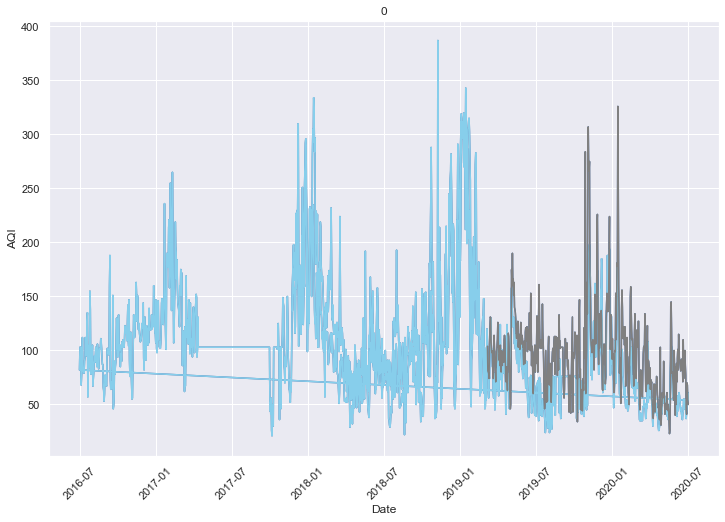

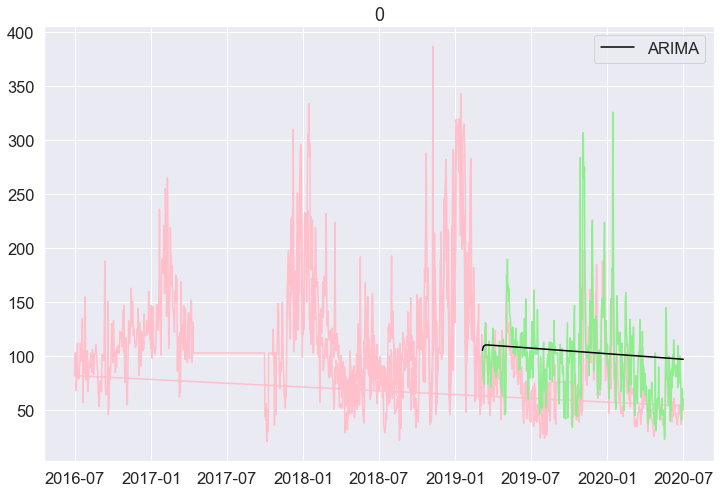

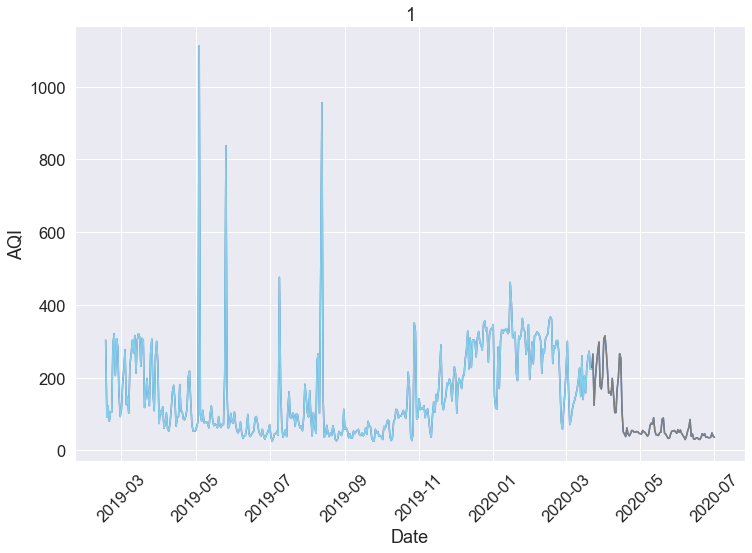

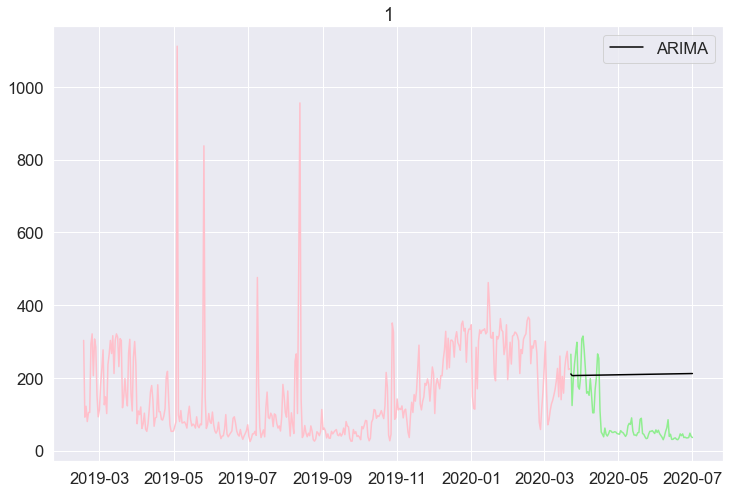

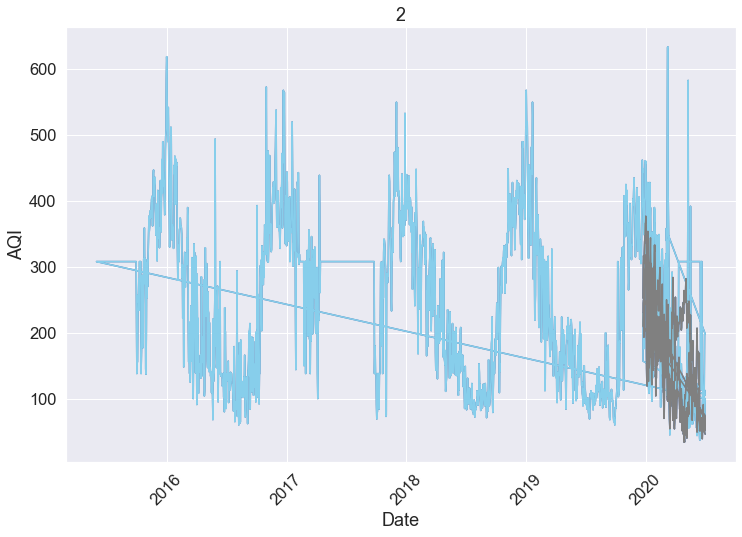

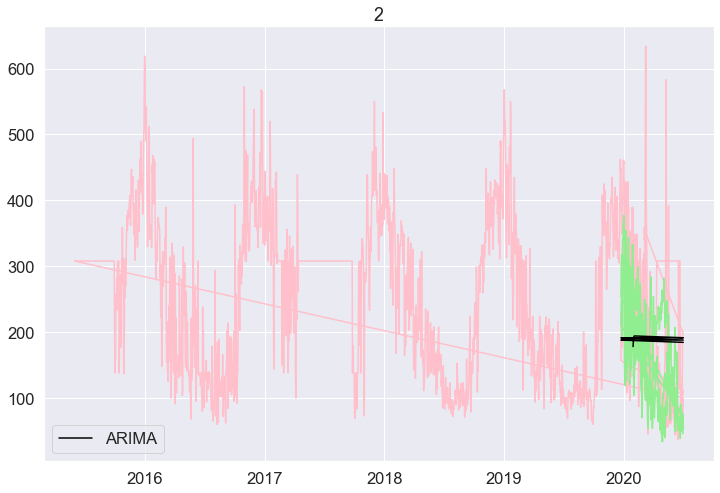

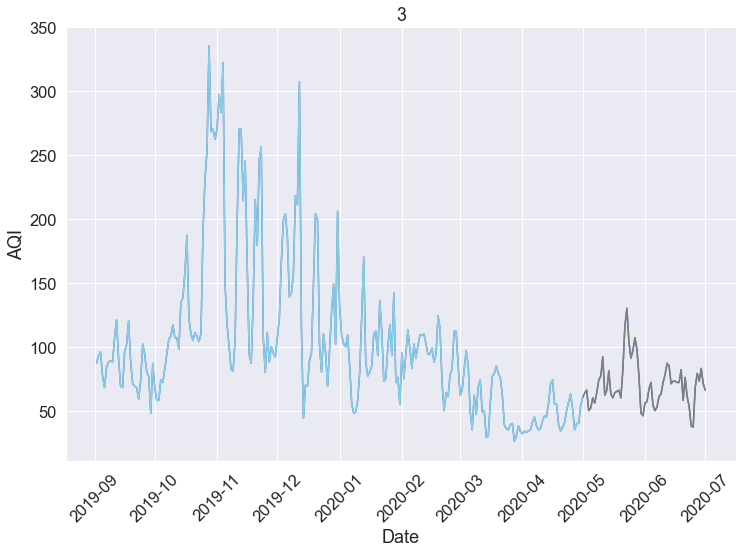

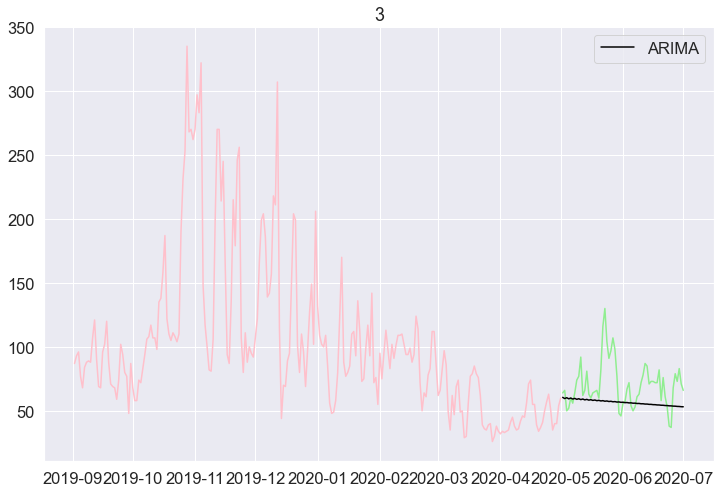

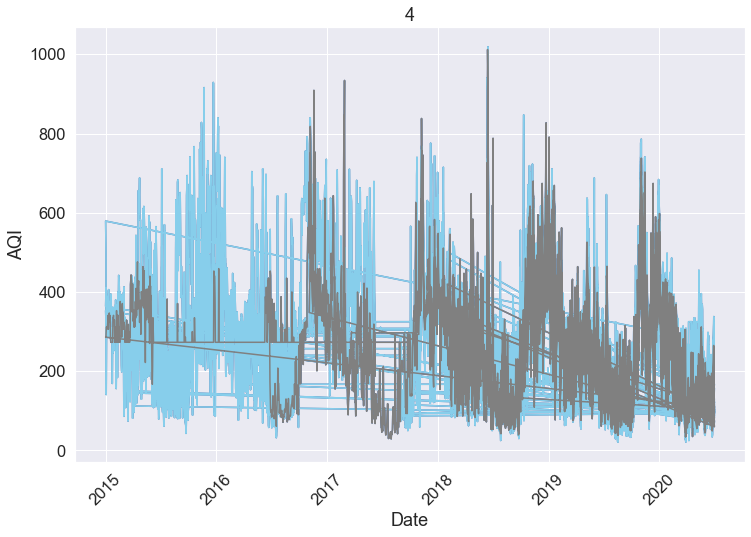

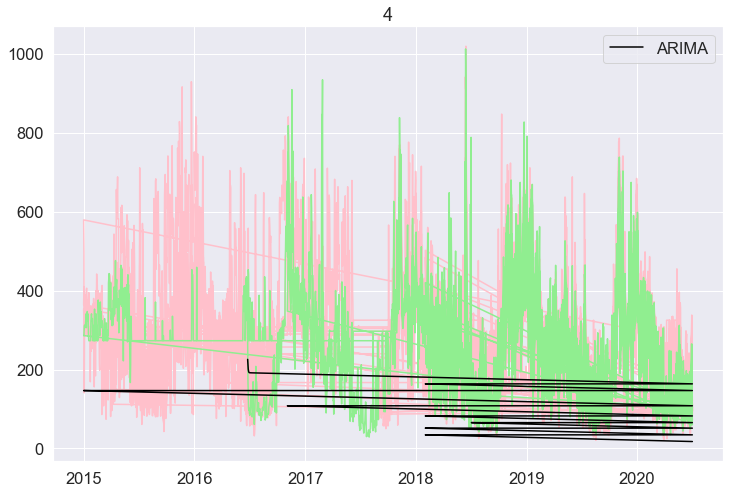

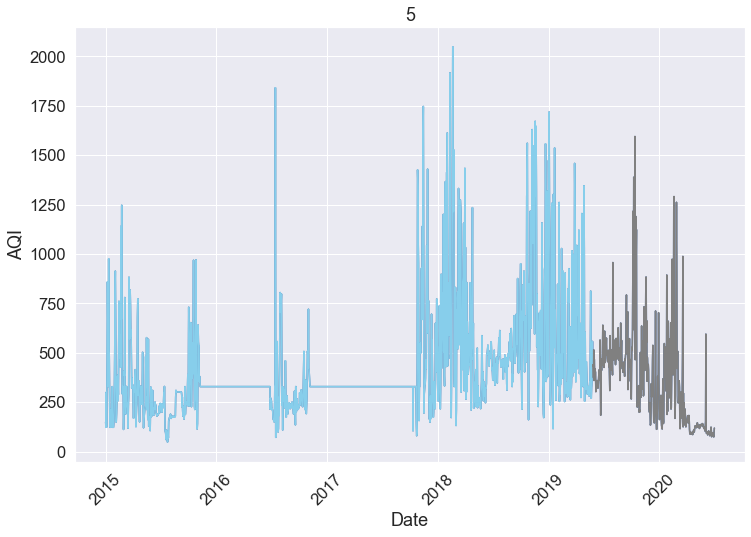

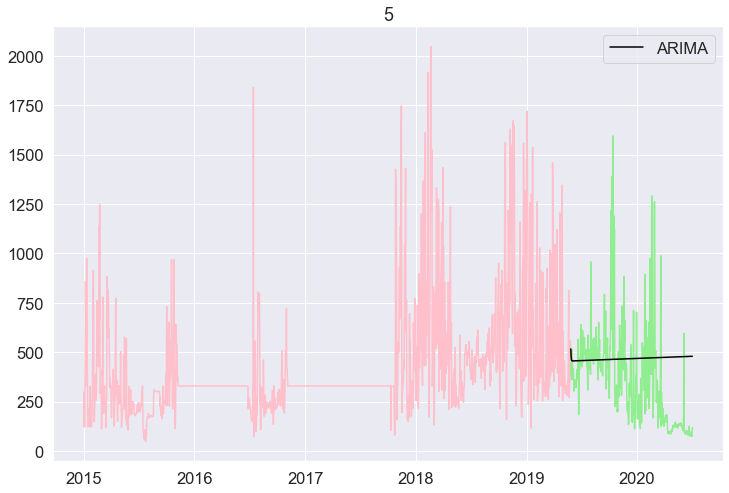

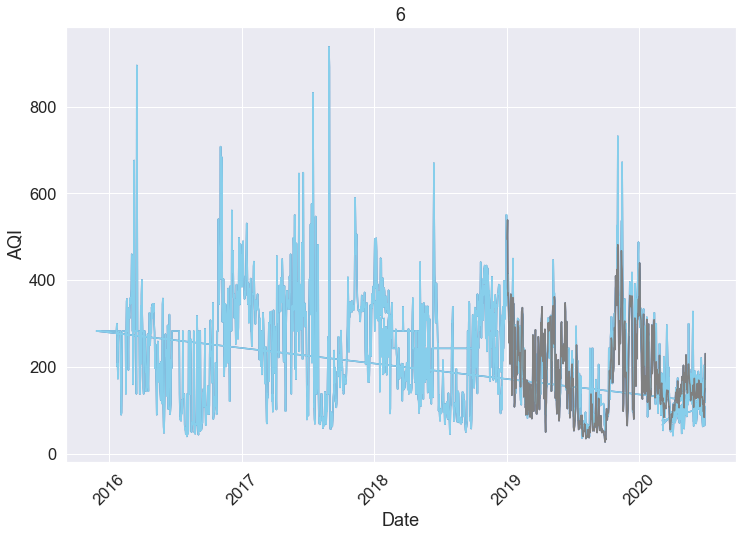

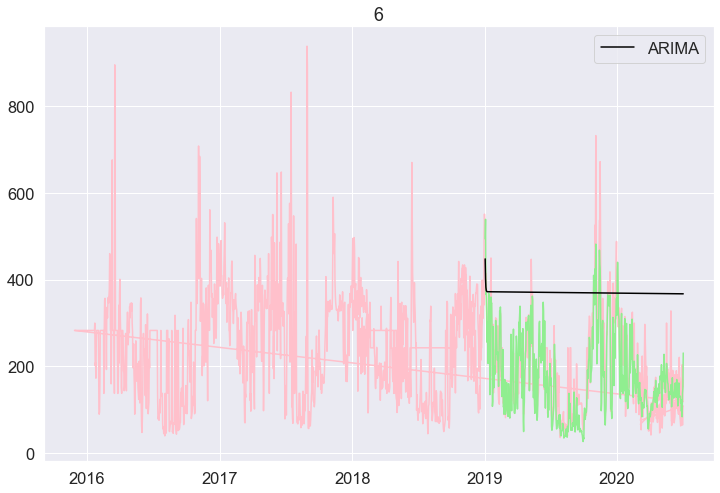

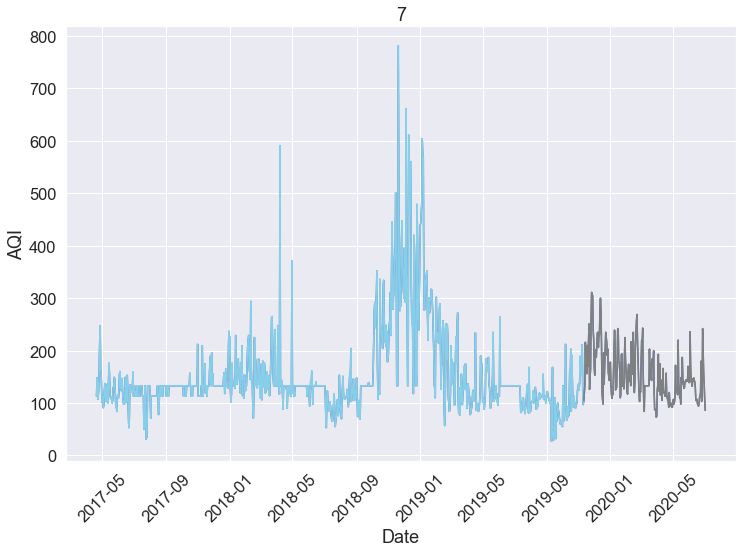

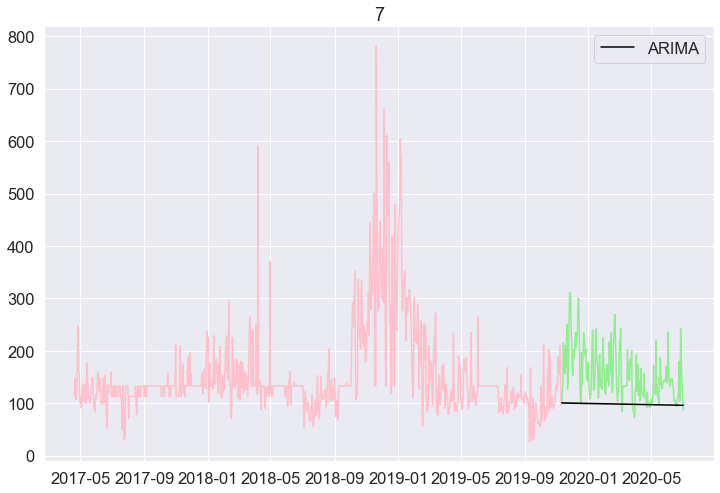

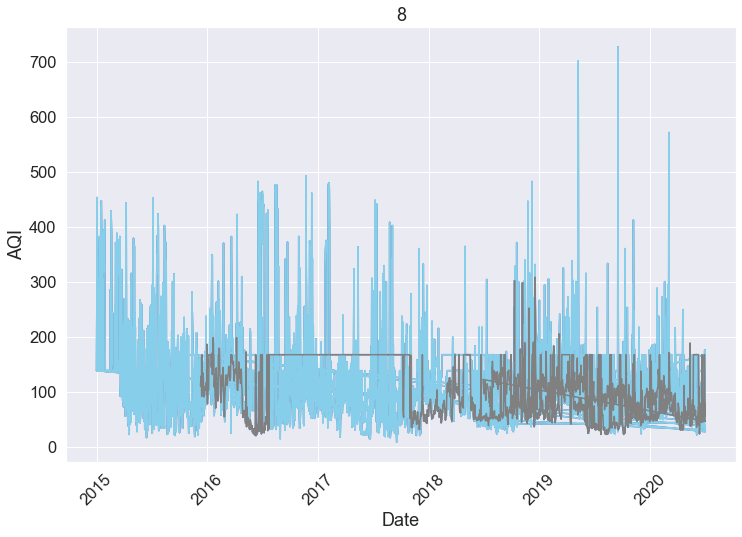

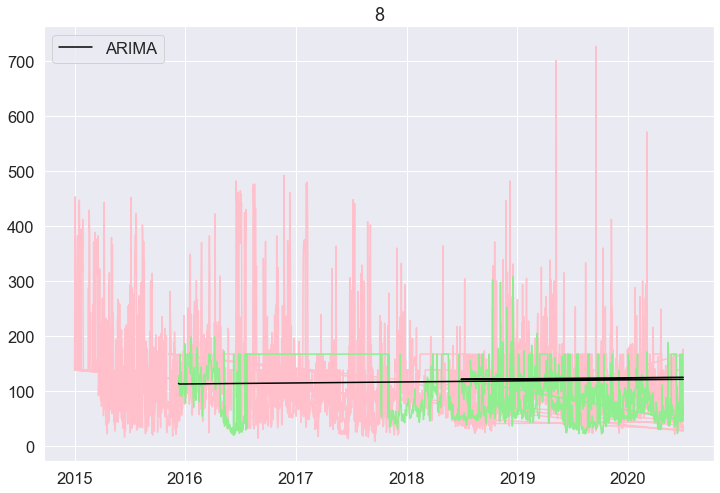

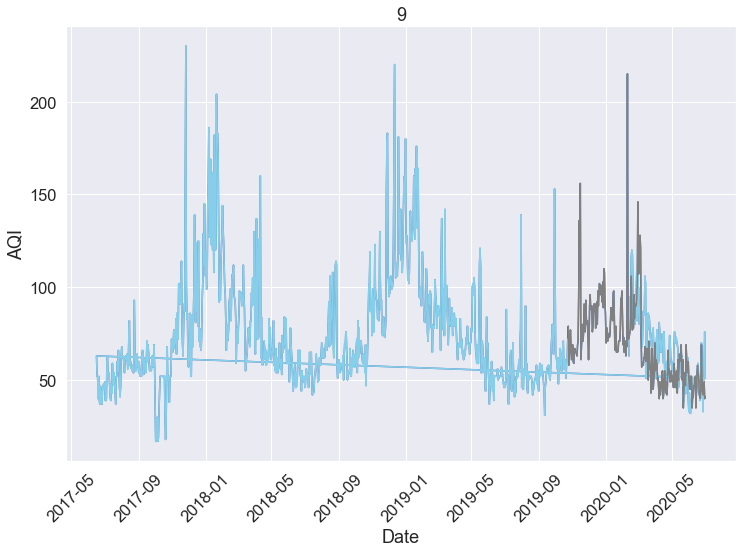

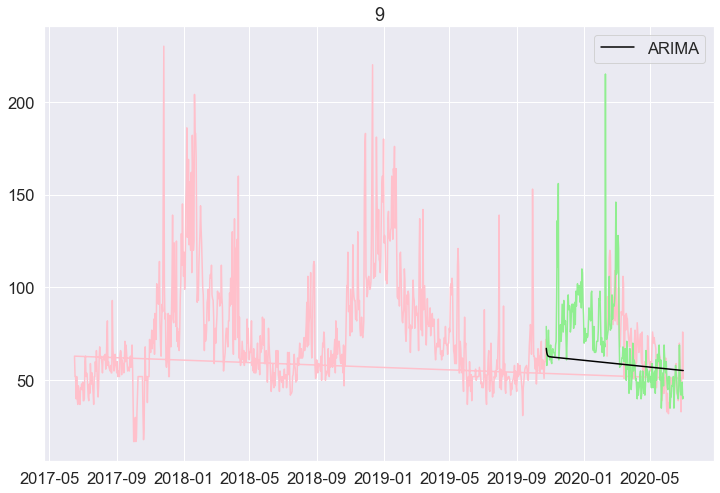

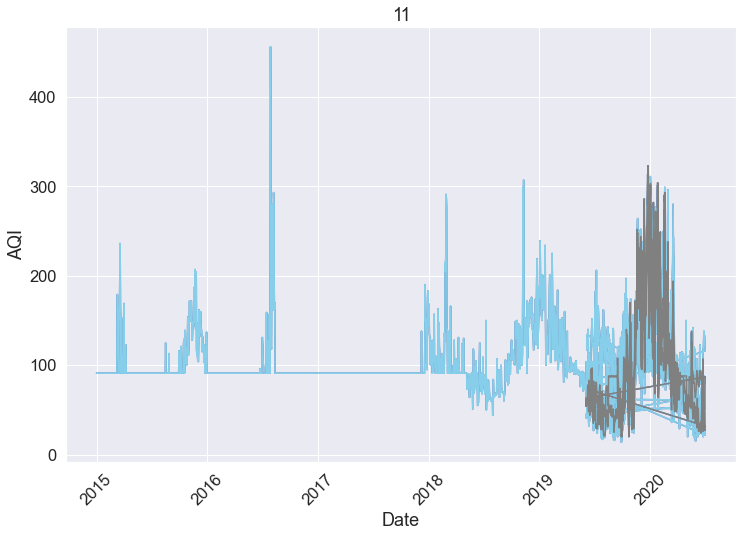

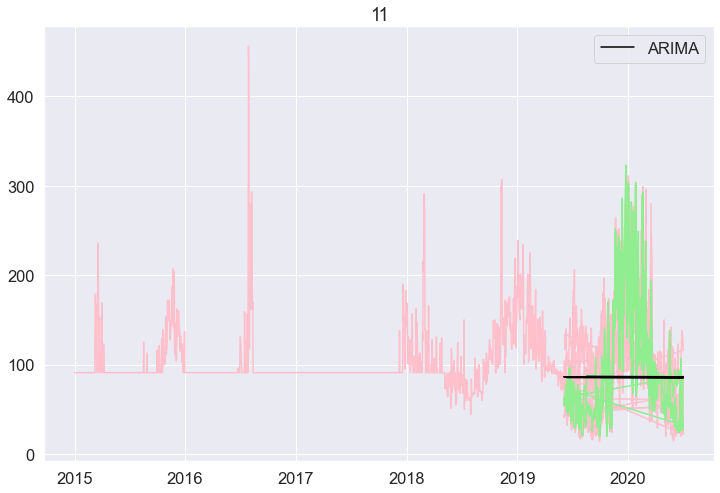

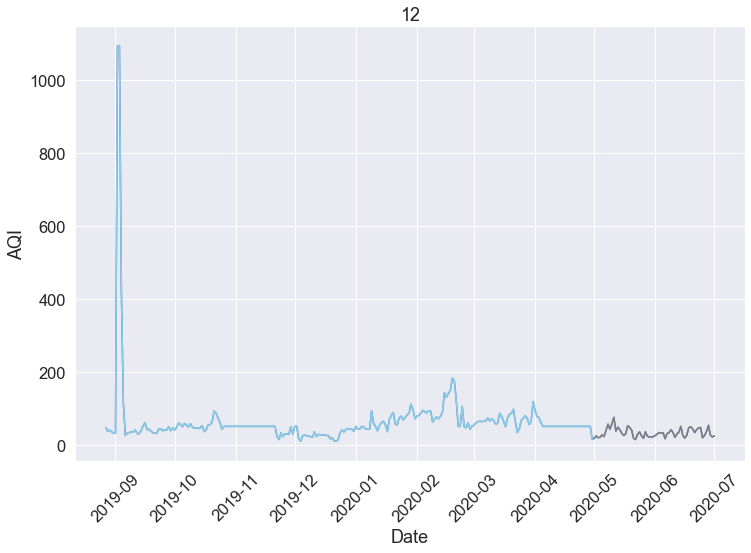

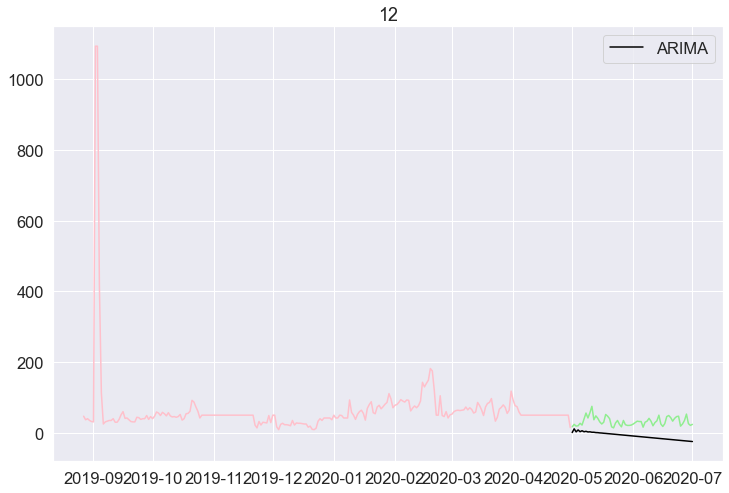

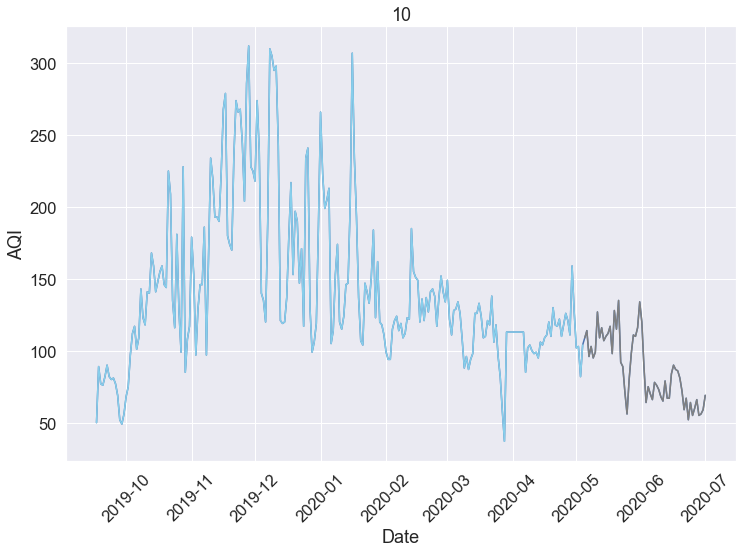

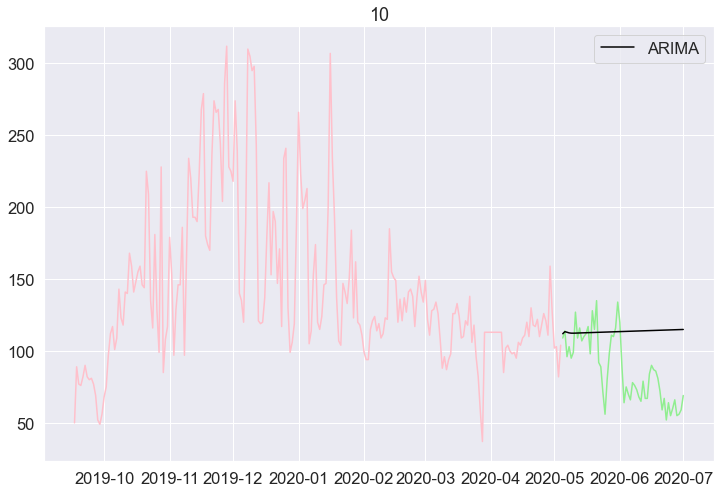

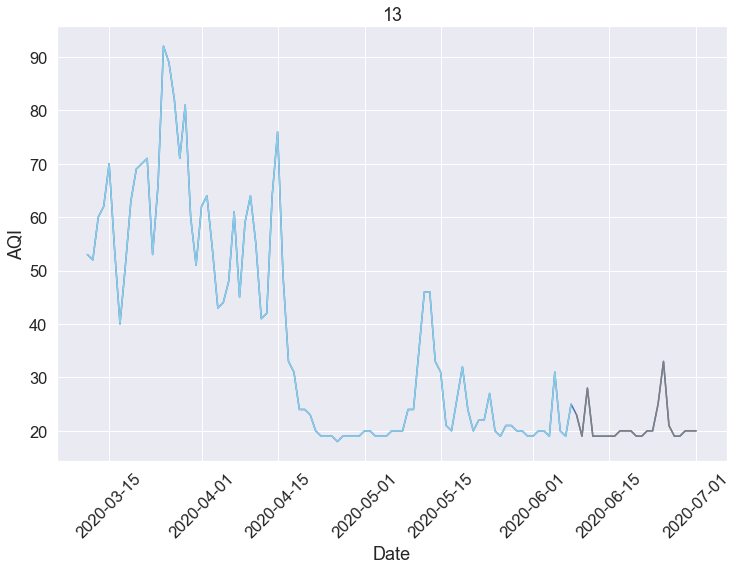

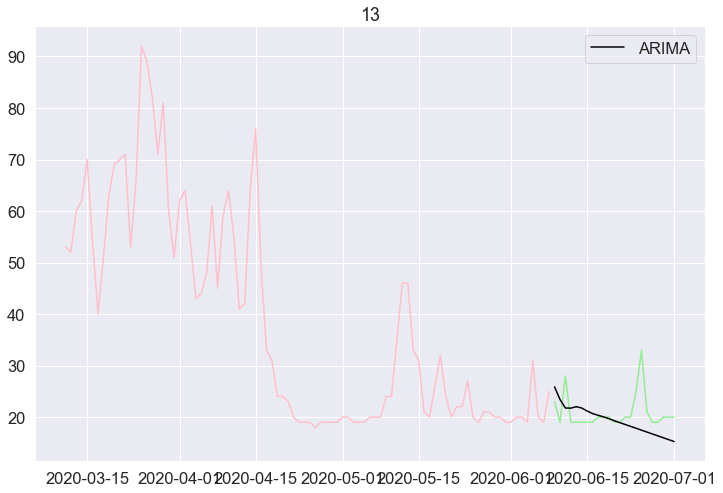

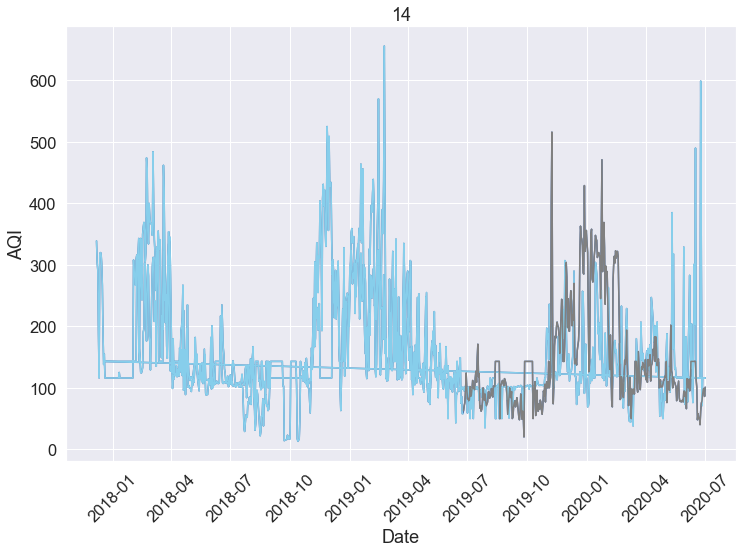

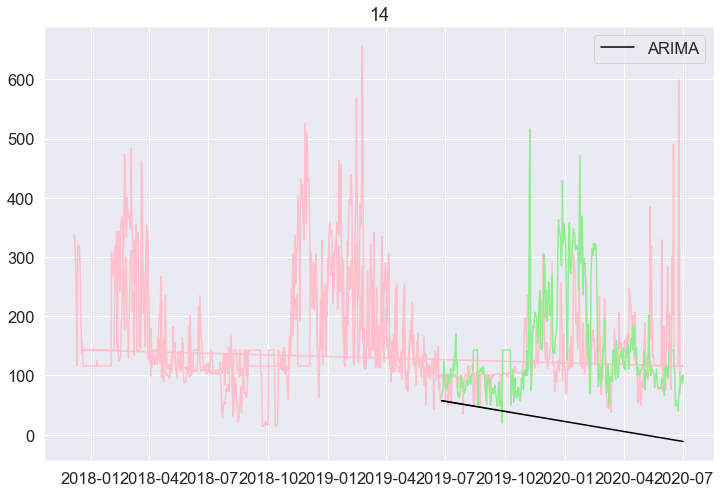

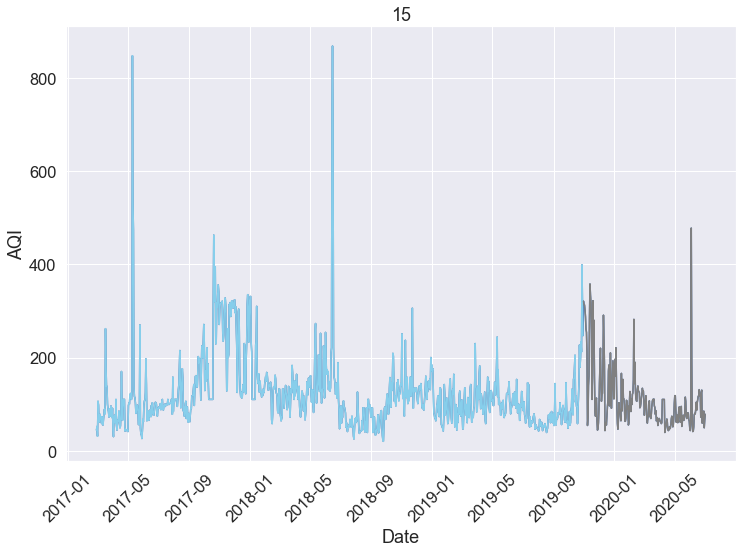

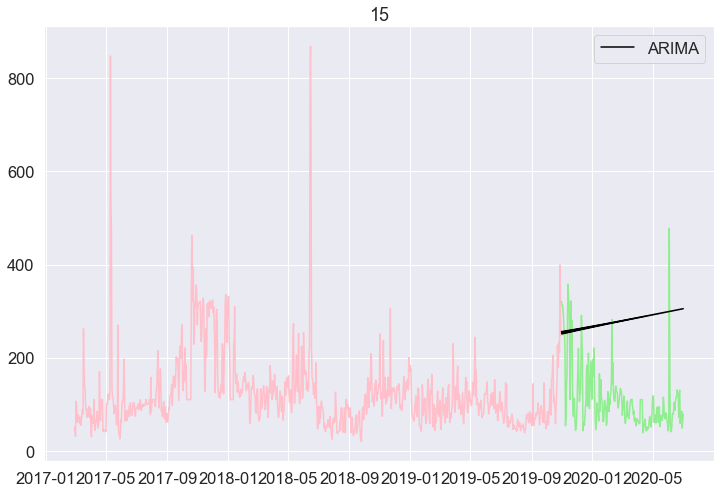

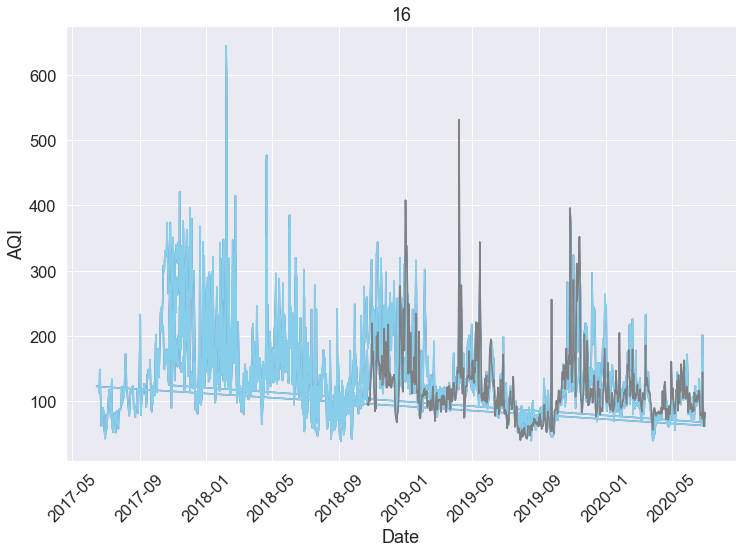

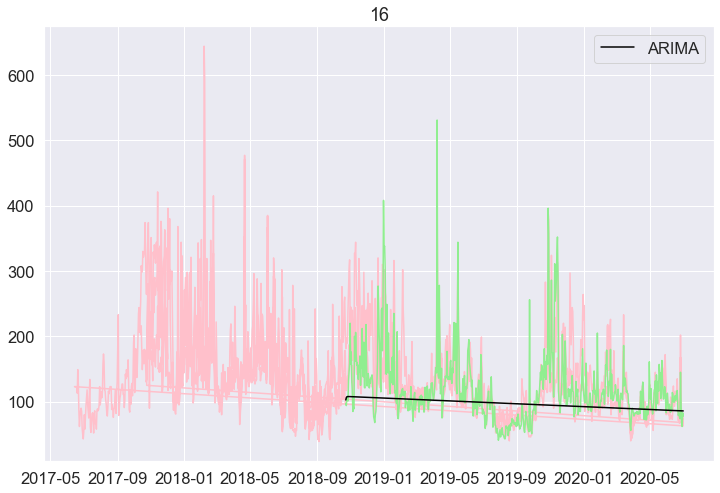

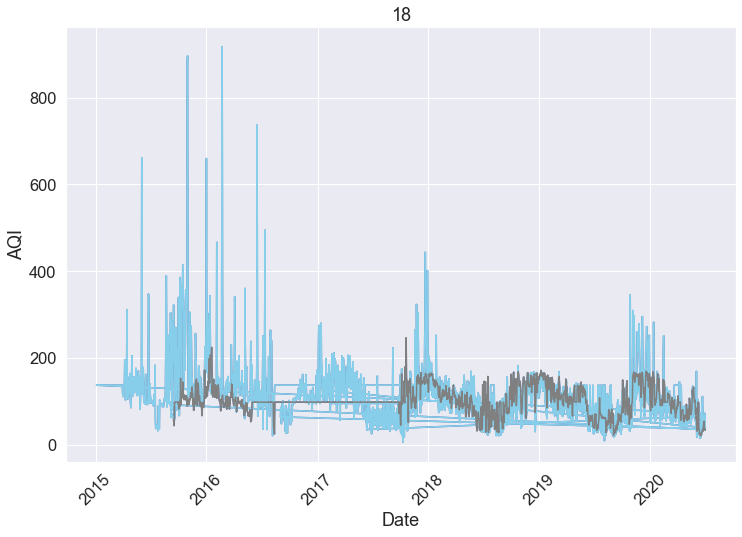

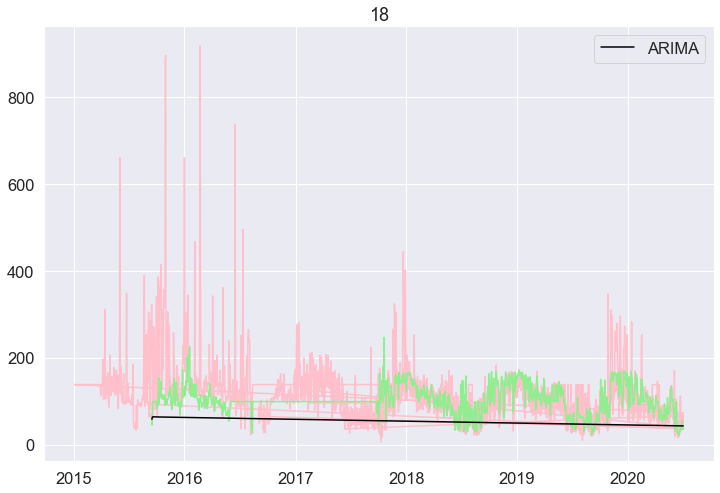

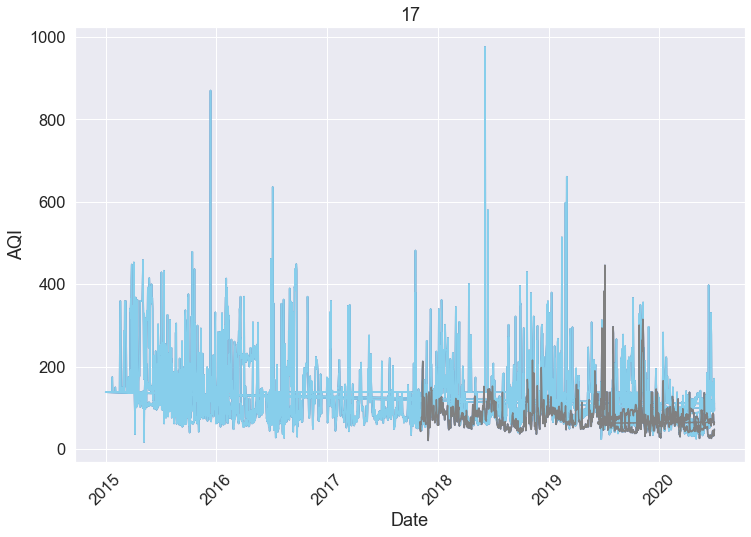

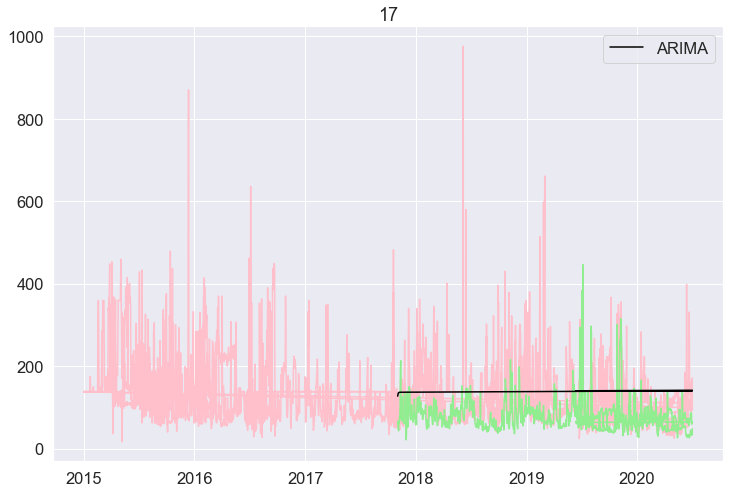

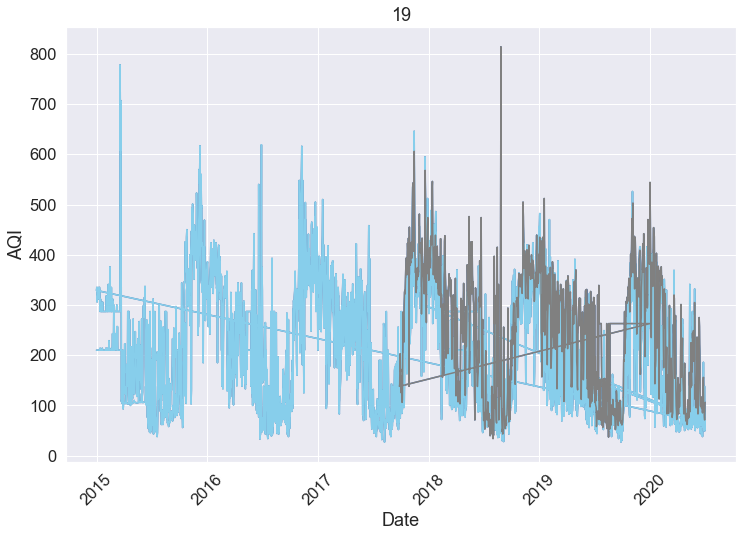

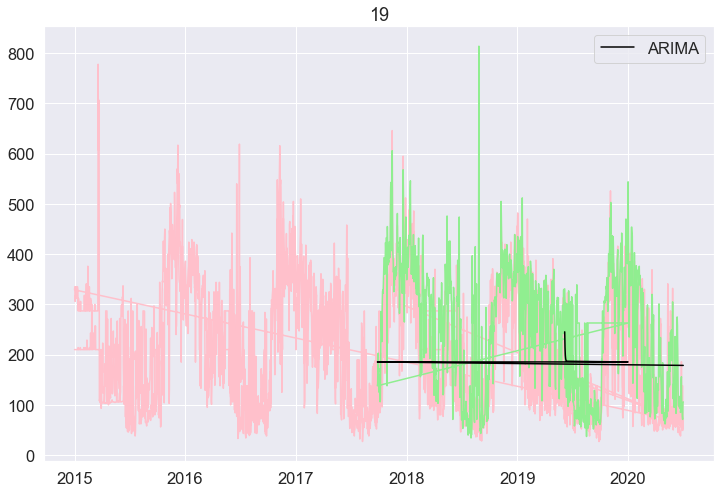

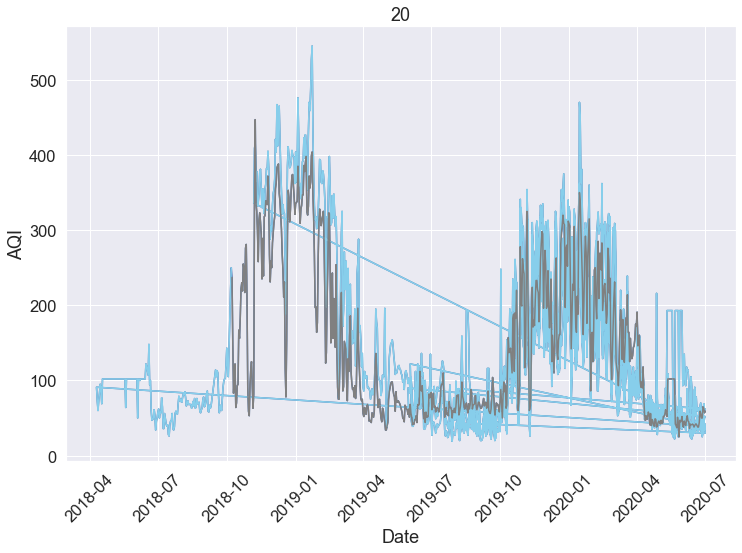

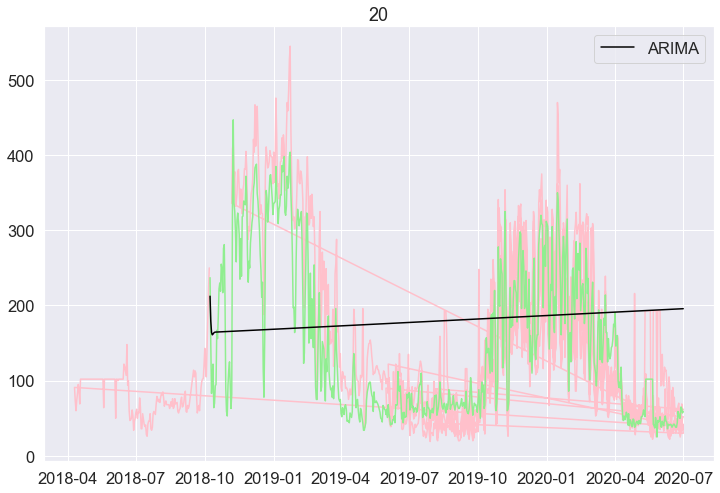

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
for State in station_day_1['State'].unique():
    station_day_0 = station_day_1[station_day_1['State']==State].copy()
    station_day_0 = station_day_0.reset_index(drop=True)
    plt.figure()
    plt.ylabel('AQI')
    plt.xlabel('Date')
    plt.plot(station_day_0['Date'], station_day_0['AQI'])

# Training testing spliting of data

    percent_split = 0.80
    train = station_day_0.iloc[:int(percent_split*len(station_day_0)), :]
    train = train.reset_index(drop=True)
    test = station_day_0.iloc[int(percent_split*len(station_day_0)):, :]
    test = test.reset_index(drop=True)
    plt.title(train['State'][0])

    
    plt.plot(train['Date'], train['AQI'], color="skyblue")
    plt.plot(test['Date'], test['AQI'], color="grey")
    plt.ylabel('AQI')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.show()
    sns.set(font_scale=1.5)

    
    
# Prediction of pollution in all cities with ARIMA

    from statsmodels.tsa.arima.model import ARIMA
    y = train['AQI']
    ARIMAmodel = ARIMA(y, order=(2, 2, 2))
    ARIMAmodel = ARIMAmodel.fit()
    y_pred = ARIMAmodel.get_forecast(len(test))
    y_pred_df = y_pred.conf_int(alpha=0.05)
    y_pred_df["Predictions"] = ARIMAmodel.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])
    y_pred_df.index = test['Date']
    y_pred_out = y_pred_df["Predictions"]
    plt.title(train['State'][0])
    plt.plot(train['Date'], train['AQI'], color="pink")
    plt.plot(test['Date'], test['AQI'], color="lightgreen")
    plt.plot(y_pred_out, color='black', label = "ARIMA")
    plt.legend()

# ML MODELING

### Assigning independent and dependent variables

In [78]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
for i in station_day_1.columns:
    if isinstance(station_day_1[i][0], str):
            station_day_1[i] = encoder.fit_transform(station_day_1[i])

In [79]:
X = station_day_1[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex","NH3_SubIndex", "CO_SubIndex", "O3_SubIndex","Benzene","Toluene"]]
y = final_df[['AQI']]

## KNN Regressor model

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error
train_X, test_X,train_y, test_y = train_test_split(X,y,test_size=.2, random_state = 4)

In [81]:
from sklearn.neighbors import KNeighborsRegressor 
knn= KNeighborsRegressor(n_neighbors=5)
knn.fit(train_X ,train_y)
predct = (test_X)
print('My predicted values',predct)
print('My actual values', test_y)
print((knn.score (test_X ,test_y)*100))

My predicted values             PM2.5_SubIndex  PM10_SubIndex  SO2_SubIndex  NOx_SubIndex  \
Date                                                                    
2018-05-03        0.000000      51.000000         15.00         60.00   
2020-04-20       53.333333      95.000000         11.25         25.00   
2018-07-28       51.666667      58.000000          7.50         21.25   
2016-01-24      385.384615     138.000000         10.00          7.50   
2019-12-26      230.000000     156.000000         15.00        136.00   
...                    ...            ...           ...           ...   
2018-08-23       63.333333     138.000000          8.75         21.25   
2020-06-01       63.333333      58.000000         15.00         16.25   
2017-08-13      296.666667     160.666667         10.00          0.00   
2020-01-27      133.333333     130.000000          5.00         21.25   
2019-10-11       78.333333      93.000000          2.50         45.00   

            NH3_SubIndex  CO_S

In [82]:
# rms = np.sqrt(mean_squared_error(test_y,predct))
# print(rms)

# Gradient boost regressor

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 13)
from sklearn import ensemble
reg = ensemble.GradientBoostingRegressor(learning_rate = 0.5, n_estimators = 50)
reg.fit(X_train, y_train)

reg.fit(X,y)

pred = reg.predict(X)
pred = pd.DataFrame(pred)
pred.head()
station_day= station_day.drop([], axis =1 )
station_day = station_day.iloc[:, 3:]

reg.score(X,y)*100

92.22197009756212

#### MSE 

In [84]:
import math
mse = mean_squared_error(y,pred)
print("MSE:-", mse)

MSE:- 1220.0033968823661


#### RMSE 

In [85]:
RMSE = math.sqrt(mse)
print('RMSE:- ', RMSE)
# rms = np.sqrt(mean_squared_error(y,pred))
# print("RMSE:-", rms)

RMSE:-  34.92854701934173


#### R2 SCORE 

In [86]:
from sklearn.metrics import r2_score
r2print_ = r2_score(y,pred)
print("R2 SCORE:-", r2print_*100)

R2 SCORE:- 92.22197009756212


# *CROSS VALIDATION
--------------------------------------------------------------------

In [87]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(100, 20) (100,)


In [88]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores)*100, std(scores)*100))

Accuracy: 85.000 (12.845)


***file formatting to CSV

In [89]:
# station_day_1 = pd.DataFrame(station_day_1)   # TO CSV
# station_day_1.to_csv(r'C:\Users\asus\.ipynb_checkpoints\station_day_predict.csv')